# eda012
gnss_logのセンサ周りの可視化

In [1]:
import os
import pandas as pd
import numpy as np
import ipynb_path
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline
pd.set_option('display.max_rows', 200)

In [2]:
def get_nb_name():
    nb_path = ipynb_path.get()
    nb_name = nb_path.rsplit('/',1)[1].replace('.ipynb','')
    return nb_name

In [3]:
def visualize_trafic(df, center, zoom=9):
    fig = px.scatter_mapbox(df,
                            
                            # Here, plotly gets, (x,y) coordinates
                            lat="latDeg",
                            lon="lngDeg",
                            
                            #Here, plotly detects color of series
                            color="phoneName",
                            labels="phoneName",
                            
                            zoom=zoom,
                            center=center,
                            height=1000,
                            width=2000)
    fig.update_layout(mapbox_style='stamen-terrain')
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.update_layout(title_text="GPS trafic")
    fig.show()

In [4]:
def visualize_collection(df, collection):
    target_df = df[df['collectionName']==collection].copy()
    lat_center = target_df['latDeg'].mean()
    lng_center = target_df['lngDeg'].mean()
    center = {"lat":lat_center, "lon":lng_center}
    
    visualize_trafic(target_df, center)

In [5]:
def calc_haversine(lat1, lon1, lat2, lon2):
    """Calculates the great circle distance between two points
    on the earth. Inputs are array-like and specified in decimal degrees.
    """
    RADIUS = 6_367_000
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    dist = 2 * RADIUS * np.arcsin(a**0.5)
    return dist

In [6]:
# directory setting
nb_name = get_nb_name()
INPUT = '../input/google-smartphone-decimeter-challenge'
OUTPUT = '../output/' + nb_name
os.makedirs(OUTPUT, exist_ok=True)

In [7]:
# reading data
base_train = pd.read_csv(INPUT + '/' + 'baseline_locations_train.csv')
base_test = pd.read_csv(INPUT + '/' + 'baseline_locations_test.csv')
sample_sub = pd.read_csv(INPUT + '/' + 'sample_submission.csv')
ground_truth = pd.read_csv(INPUT + '/prep/ground_truth_train.csv')

In [8]:
df = pd.read_csv(INPUT + '/prep/gnss/train/Status.csv')

In [9]:
gnss_exist_train = base_train[['collectionName', 'phoneName']].drop_duplicates()

for c in ['Raw', 'UncalAccel', 'UncalGyro', 'UncalMag', 'Fix', 'Status', 'OrientationDeg']:
    tmp = pd.read_csv(f'{INPUT}/prep/gnss/train/{c}.csv')
    tmp = tmp[['collectionName', 'phoneName']].drop_duplicates()
    tmp[c] = 1
    gnss_exist_train = gnss_exist_train.merge(tmp, on=['collectionName', 'phoneName'], how='left')
gnss_exist_train = gnss_exist_train.fillna(0)
gnss_exist_train.to_csv(OUTPUT + '/gnss_exist_train.csv', index=False)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
gnss_exist_test = base_test[['collectionName', 'phoneName']].drop_duplicates()

for c in ['Raw', 'UncalAccel', 'UncalGyro', 'UncalMag', 'Fix', 'Status', 'OrientationDeg']:
    tmp = pd.read_csv(f'{INPUT}/prep/gnss/test/{c}.csv')
    tmp = tmp[['collectionName', 'phoneName']].drop_duplicates()
    tmp[c] = 1
    gnss_exist_test = gnss_exist_test.merge(tmp, on=['collectionName', 'phoneName'], how='left')
gnss_exist_test = gnss_exist_test.fillna(0)
gnss_exist_test.to_csv(OUTPUT + '/gnss_exist_test.csv', index=False)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
gnss_exist_train

collectionName        phoneName  Raw  UncalAccel  UncalGyro  \
0   2020-05-14-US-MTV-1           Pixel4    1         1.0        1.0   
1   2020-05-14-US-MTV-1   Pixel4XLModded    1         1.0        1.0   
2   2020-05-14-US-MTV-2           Pixel4    1         1.0        1.0   
3   2020-05-14-US-MTV-2   Pixel4XLModded    1         1.0        1.0   
4   2020-05-21-US-MTV-1           Pixel4    1         1.0        1.0   
5   2020-05-21-US-MTV-2           Pixel4    1         1.0        1.0   
6   2020-05-21-US-MTV-2         Pixel4XL    1         1.0        1.0   
7   2020-05-29-US-MTV-1           Pixel4    1         1.0        1.0   
8   2020-05-29-US-MTV-1         Pixel4XL    1         1.0        1.0   
9   2020-05-29-US-MTV-1   Pixel4XLModded    1         1.0        1.0   
10  2020-05-29-US-MTV-2           Pixel4    1         1.0        1.0   
11  2020-05-29-US-MTV-2         Pixel4XL    1         1.0        1.0   
12  2020-06-04-US-MTV-1           Pixel4    1         1.0        1.0   
13  2020-06-04-US-MTV-1         Pixel4XL    1         1.0        1.0   
14  2020-06-04-US-MTV-1   Pixel4XLModded    1         1.0        1.0   
15  2020-06-05-US-MTV-1           Pixel4    1         1.0        1.0   
16  2020-06-05-US-MTV-1         Pixel4XL    1         1.0        1.0   
17  2020-06-05-US-MTV-1   Pixel4XLModded    1         1.0        1.0   
18  2020-06-05-US-MTV-2           Pixel4    1         1.0        1.0   
19  2020-06-05-US-MTV-2         Pixel4XL    1         1.0        1.0   
20  2020-06-11-US-MTV-1           Pixel4    1         1.0        1.0   
21  2020-06-11-US-MTV-1         Pixel4XL    1         1.0        1.0   
22  2020-07-08-US-MTV-1           Pixel4    1         1.0        1.0   
23  2020-07-08-US-MTV-1         Pixel4XL    1         1.0        1.0   
24  2020-07-08-US-MTV-1   Pixel4XLModded    1         1.0        1.0   
25  2020-07-17-US-MTV-1              Mi8    1         1.0        1.0   
26  2020-07-17-US-MTV-2              Mi8    1         1.0        1.0   
27  2020-08-03-US-MTV-1              Mi8    1         0.0        0.0   
28  2020-08-03-US-MTV-1           Pixel4    1         0.0        0.0   
29  2020-08-06-US-MTV-2              Mi8    1         0.0        0.0   
30  2020-08-06-US-MTV-2           Pixel4    1         0.0        0.0   
31  2020-08-06-US-MTV-2         Pixel4XL    1         0.0        0.0   
32   2020-09-04-US-SF-1              Mi8    1         1.0        1.0   
33   2020-09-04-US-SF-1           Pixel4    1         1.0        1.0   
34   2020-09-04-US-SF-1         Pixel4XL    1         1.0        1.0   
35   2020-09-04-US-SF-2              Mi8    1         1.0        1.0   
36   2020-09-04-US-SF-2           Pixel4    1         1.0        1.0   
37   2020-09-04-US-SF-2         Pixel4XL    1         1.0        1.0   
38  2021-01-04-US-RWC-1           Pixel4    1         1.0        1.0   
39  2021-01-04-US-RWC-1     Pixel4Modded    1         1.0        1.0   
40  2021-01-04-US-RWC-1         Pixel4XL    1         1.0        1.0   
41  2021-01-04-US-RWC-1           Pixel5    1         1.0        1.0   
42  2021-01-04-US-RWC-2           Pixel4    1         1.0        1.0   
43  2021-01-04-US-RWC-2     Pixel4Modded    1         1.0        1.0   
44  2021-01-04-US-RWC-2         Pixel4XL    1         1.0        1.0   
45  2021-01-04-US-RWC-2           Pixel5    1         1.0        1.0   
46  2021-01-05-US-SVL-1              Mi8    1         1.0        1.0   
47  2021-01-05-US-SVL-1           Pixel4    1         1.0        1.0   
48  2021-01-05-US-SVL-1         Pixel4XL    1         1.0        1.0   
49  2021-01-05-US-SVL-1           Pixel5    1         1.0        1.0   
50  2021-01-05-US-SVL-2           Pixel4    1         1.0        1.0   
51  2021-01-05-US-SVL-2     Pixel4Modded    1         1.0        1.0   
52  2021-01-05-US-SVL-2         Pixel4XL    1         1.0        1.0   
53  2021-03-10-US-SVL-1         Pixel4XL    1         1.0        1.0   
54  2021-03-10-US-SVL-1  SamsungS20Ultra    1    

In [12]:
gnss_exist_test

collectionName        phoneName  Raw  UncalAccel  UncalGyro  \
0   2020-05-15-US-MTV-1           Pixel4    1         1.0        1.0   
1   2020-05-15-US-MTV-1         Pixel4XL    1         1.0        1.0   
2   2020-05-28-US-MTV-1           Pixel4    1         1.0        1.0   
3   2020-05-28-US-MTV-1         Pixel4XL    1         1.0        1.0   
4   2020-05-28-US-MTV-2           Pixel4    1         1.0        1.0   
5   2020-05-28-US-MTV-2         Pixel4XL    1         1.0        1.0   
6   2020-05-28-US-MTV-2   Pixel4XLModded    1         1.0        1.0   
7   2020-06-04-US-MTV-2           Pixel4    1         1.0        1.0   
8   2020-06-04-US-MTV-2         Pixel4XL    1         1.0        1.0   
9   2020-06-04-US-MTV-2   Pixel4XLModded    1         1.0        1.0   
10  2020-06-10-US-MTV-1           Pixel4    1         1.0        1.0   
11  2020-06-10-US-MTV-1         Pixel4XL    1         1.0        1.0   
12  2020-06-10-US-MTV-1   Pixel4XLModded    1         1.0        1.0   
13  2020-06-10-US-MTV-2           Pixel4    1         1.0        1.0   
14  2020-06-10-US-MTV-2         Pixel4XL    1         1.0        1.0   
15  2020-06-10-US-MTV-2   Pixel4XLModded    1         1.0        1.0   
16  2020-08-03-US-MTV-2              Mi8    1         0.0        0.0   
17  2020-08-03-US-MTV-2           Pixel4    1         0.0        0.0   
18  2020-08-03-US-MTV-2         Pixel4XL    1         0.0        0.0   
19  2020-08-13-US-MTV-1              Mi8    1         0.0        0.0   
20  2020-08-13-US-MTV-1           Pixel4    1         0.0        0.0   
21  2021-03-16-US-MTV-2     Pixel4Modded    1         1.0        1.0   
22  2021-03-16-US-MTV-2  SamsungS20Ultra    1         1.0        1.0   
23  2021-03-16-US-RWC-2         Pixel4XL    1         1.0        1.0   
24  2021-03-16-US-RWC-2           Pixel5    1         1.0        1.0   
25  2021-03-16-US-RWC-2  SamsungS20Ultra    1         1.0        1.0   
26  2021-03-25-US-PAO-1              Mi8    1         1.0        1.0   
27  2021-03-25-US-PAO-1           Pixel4    1         1.0        1.0   
28  2021-03-25-US-PAO-1     Pixel4Modded    1         1.0        1.0   
29  2021-03-25-US-PAO-1           Pixel5    1         1.0        1.0   
30  2021-03-25-US-PAO-1  SamsungS20Ultra    1         1.0        1.0   
31  2021-04-02-US-SJC-1           Pixel4    1         1.0        1.0   
32  2021-04-02-US-SJC-1           Pixel5    1         1.0        1.0   
33  2021-04-08-US-MTV-1           Pixel4    1         1.0        1.0   
34  2021-04-08-US-MTV-1     Pixel4Modded    1         1.0        1.0   
35  2021-04-08-US-MTV-1           Pixel5    1         1.0        1.0   
36  2021-04-08-US-MTV-1  SamsungS20Ultra    1         1.0        1.0   
37  2021-04-21-US-MTV-1           Pixel4    1         1.0        1.0   
38  2021-04-21-US-MTV-1     Pixel4Modded    1         1.0        1.0   
39  2021-04-22-US-SJC-2  SamsungS20Ultra    1         1.0        1.0   
40  2021-04-26-US-SVL-2  SamsungS20Ultra    1         1.0        1.0   
41  2021-04-28-US-MTV-2           Pixel4    1         1.0        1.0   
42  2021-04-28-US-MTV-2  SamsungS20Ultra    1         1.0        1.0   
43  2021-04-29-US-MTV-2           Pixel4    1         1.0        1.0   
44  2021-04-29-US-MTV-2           Pixel5    1         1.0        1.0   
45  2021-04-29-US-MTV-2  SamsungS20Ultra    1         1.0        1.0   
46  2021-04-29-US-SJC-3           Pixel4    1         1.0        1.0   
47  2021-04-29-US-SJC-3  SamsungS20Ultra    1         1.0        1.0   

    UncalMag  Fix  Status  OrientationDeg  
0        1.0  0.0     1.0             0.0  
1        1.0  0.0     1.0             0.0  
2        1.0  0.0     1.0             0.0  
3        1.0  0.0     1.0             0.0  
4        1.0  0.0     1.0             0.0  
5        1.0  0.0     1.0             0.0  
6        1.0  0.0     1.0             0.0  
7        1.0  0.0     1.0             0.0  
8        1.0  0.0     1.0             0.0  
9        1.0  0.0     1.0             0.

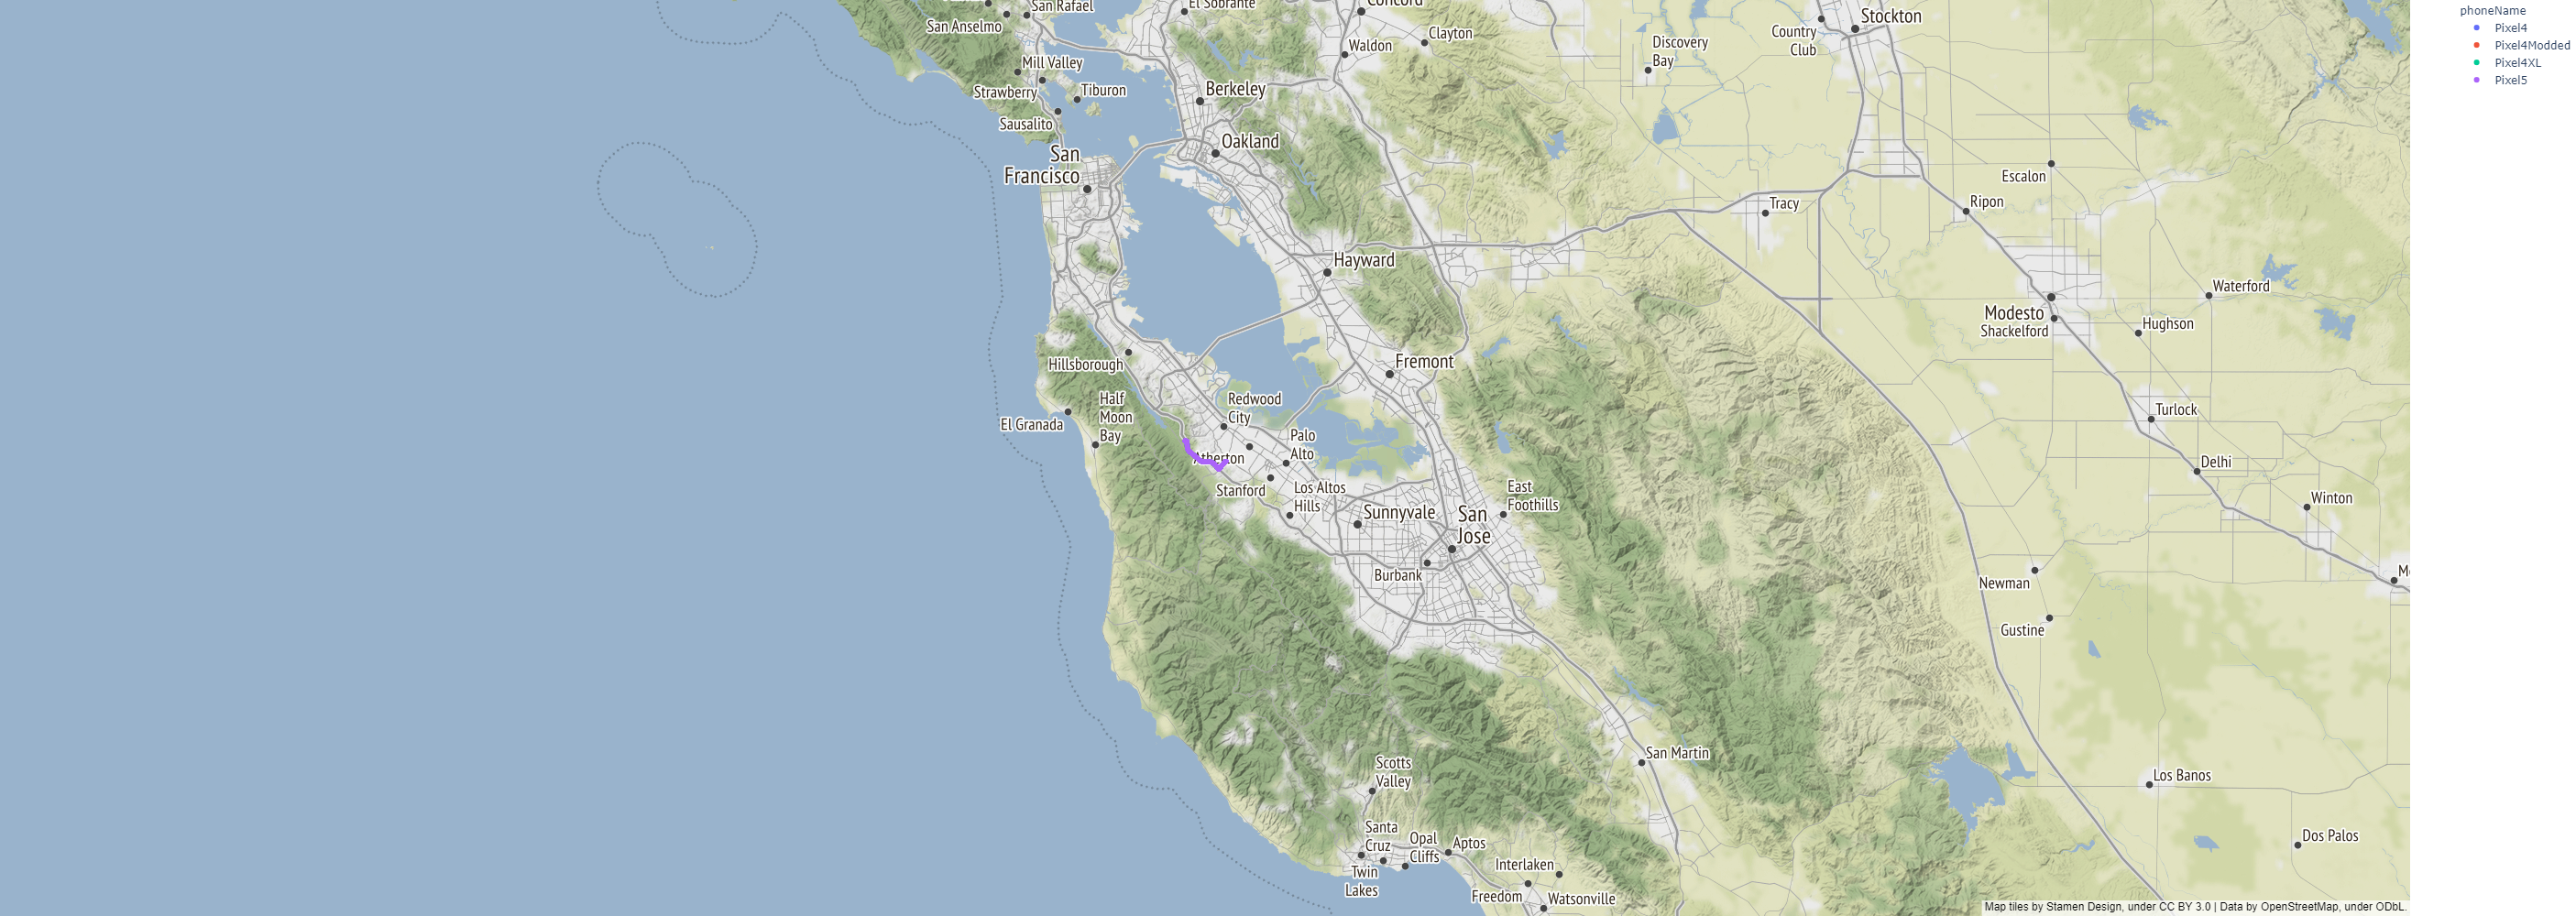

In [13]:
visualize_collection(base_train, '2021-01-04-US-RWC-1')

In [14]:
raw_train = pd.read_csv(INPUT + '/prep/gnss/train/Raw.csv')
accel_train = pd.read_csv(INPUT + '/prep/gnss/train/UncalAccel.csv')
gyro_train = pd.read_csv(INPUT + '/prep/gnss/train/UncalGyro.csv')
mag_train = pd.read_csv(INPUT + '/prep/gnss/train/UncalMag.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning:

Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.



In [22]:
raw_test = pd.read_csv(INPUT + '/prep/gnss/test/Raw.csv')
accel_test = pd.read_csv(INPUT + '/prep/gnss/test/UncalAccel.csv')
gyro_test = pd.read_csv(INPUT + '/prep/gnss/test/UncalGyro.csv')
mag_test = pd.read_csv(INPUT + '/prep/gnss/test/UncalMag.csv')

# 時刻の確認

In [18]:
raw_train['gpsTime'] = ((raw_train['TimeNanos'] - raw_train['FullBiasNanos']) / 1000000.0).astype('int64')
raw_train['gpsTime2'] = raw_train['utcTimeMillis'] - 315964800000 + 18000
(raw_train['gpsTime'] - raw_train['gpsTime2']).value_counts()

0    4385984
1        221
dtype: int64

In [19]:
raw_test['gpsTime'] = ((raw_test['TimeNanos'] - raw_test['FullBiasNanos']) / 1000000.0).astype('int64')
raw_test['gpsTime2'] = raw_test['utcTimeMillis'] - 315964800000 + 18000
(raw_test['gpsTime'] - raw_test['gpsTime2']).value_counts()

0    2955971
1        249
dtype: int64

In [21]:
display(raw_train['LeapSecond'].value_counts())
display(raw_test['LeapSecond'].value_counts())

18.0    1303951
Name: LeapSecond, dtype: int64

18.0    812088
Name: LeapSecond, dtype: int64

# 可視化

In [28]:
accel_train

utcTimeMillis  elapsedRealtimeNanos  UncalAccelXMps2  \
0         1590096145767          388949302725        -2.127655   
1         1590096145769          388951731996        -2.427884   
2         1590096145772          388954188610        -2.649440   
3         1590096145774          388956631579        -2.760863   
4         1590096145777          388959060850        -2.775203   
...                 ...                   ...              ...   
20523367  1590796844791         2214597316626         0.133604   
20523368  1590796844800         2214606996262        -0.009243   
20523369  1590796844810         2214616675897        -0.114211   
20523370  1590796844820         2214626355584        -0.131431   
20523371  1590796844830         2214636035220         0.031124   

          UncalAccelYMps2  UncalAccelZMps2       collectionName phoneName  \
0               10.233923        -0.053478  2020-05-21-US-MTV-2    Pixel4   
1               10.108892        -0.152563  2020-05-21-US-MTV-2    Pixel4   
2               10.083163        -0.206106  2020-05-21-US-MTV-2    Pixel4   
3               10.055699        -0.271014  2020-05-21-US-MTV-2    Pixel4   
4               10.070100        -0.285293  2020-05-21-US-MTV-2    Pixel4   
...                   ...              ...                  ...       ...   
20523367        10.150373         1.042262  2020-05-29-US-MTV-2  Pixel4XL   
20523368        10.186256         1.146229  2020-05-29-US-MTV-2  Pixel4XL   
20523369        10.055800         1.365687  2020-05-29-US-MTV-2  Pixel4XL   
20523370         9.785808         1.162168  2020-05-29-US-MTV-2  Pixel4XL   
20523371         9.496376         1.267023  2020-05-29-US-MTV-2  Pixel4XL   

          BiasXMps2  BiasYMps2  BiasZMps2  
0               NaN        NaN        NaN  
1               NaN        NaN        NaN  
2               NaN        NaN        NaN  
3               NaN        NaN        NaN  
4               NaN        NaN        NaN  
...             ...        ...        ...  
20523367        NaN        NaN        NaN  
20523368        NaN        NaN        NaN  
20523369        NaN        NaN        NaN  
20523370        NaN        NaN        NaN  
20523371        NaN        NaN        NaN  

[20523372 rows x 10 columns]

In [29]:
ground_truth

collectionName        phoneName  millisSinceGpsEpoch     latDeg  \
0       2020-05-14-US-MTV-1           Pixel4        1273529463442  37.423576   
1       2020-05-14-US-MTV-1           Pixel4        1273529464442  37.423576   
2       2020-05-14-US-MTV-1           Pixel4        1273529465442  37.423576   
3       2020-05-14-US-MTV-1           Pixel4        1273529466442  37.423576   
4       2020-05-14-US-MTV-1           Pixel4        1273529467442  37.423576   
...                     ...              ...                  ...        ...   
131337  2021-04-29-US-SJC-2  SamsungS20Ultra        1303760315000  37.334475   
131338  2021-04-29-US-SJC-2  SamsungS20Ultra        1303760316000  37.334475   
131339  2021-04-29-US-SJC-2  SamsungS20Ultra        1303760317000  37.334475   
131340  2021-04-29-US-SJC-2  SamsungS20Ultra        1303760318000  37.334475   
131341  2021-04-29-US-SJC-2  SamsungS20Ultra        1303760319000  37.334475   

            lngDeg  heightAboveWgs84EllipsoidM  timeSinceFirstFixSeconds  \
0      -122.094132                       33.21                    551.44   
1      -122.094132                       33.21                    552.44   
2      -122.094132                       33.21                    553.44   
3      -122.094132                       33.20                    554.44   
4      -122.094132                       33.20                    555.44   
...            ...                         ...                       ...   
131337 -121.899613                       56.62                   2632.00   
131338 -121.899613                       56.62                   2633.00   
131339 -121.899613                       56.62                   2634.00   
131340 -121.899613                       56.63                   2635.00   
131341 -121.899613                       56.64                   2636.00   

        hDop  vDop  speedMps  courseDegree  
0        1.1   0.0       0.0          12.7  
1        1.1   0.0       0.0          12.7  
2        1.1   0.0       0.0          12.7  
3        1.1   0.0       0.0          12.7  
4        1.1   0.0       0.0          12.7  
...      ...   ...       ...           ...  
131337   1.1   0.0       0.0          60.0  
131338   1.1   0.0       0.0          60.0  
131339   0.9   0.0       0.0          60.0  
131340   1.0   0.0       0.0          60.0  
131341   1.1   0.0       0.0          60.0  

[131342 rows x 11 columns]

In [30]:
gyro_train

utcTimeMillis  elapsedRealtimeNanos  UncalGyroXRadPerSec  \
0         1590096145765          388948772725             0.052056   
1         1590096145769          388951201996             0.036337   
2         1590096145771          388953658610             0.017149   
3         1590096145774          388956101579            -0.000782   
4         1590096145776          388958530850            -0.018673   
...                 ...                   ...                  ...   
20534261  1590796844795         2214601036470            -0.057600   
20534262  1590796844804         2214610716105            -0.070587   
20534263  1590796844814         2214620395741            -0.074521   
20534264  1590796844824         2214630075376            -0.091207   
20534265  1590796844833         2214639755064            -0.092580   

          UncalGyroYRadPerSec  UncalGyroZRadPerSec       collectionName  \
0                    0.208332            -0.098879  2020-05-21-US-MTV-2   
1                    0.197658            -0.079120  2020-05-21-US-MTV-2   
2                    0.188362            -0.049560  2020-05-21-US-MTV-2   
3                    0.177865            -0.016336  2020-05-21-US-MTV-2   
4                    0.167396             0.019334  2020-05-21-US-MTV-2   
...                       ...                  ...                  ...   
20534261            -0.001745            -0.013139  2020-05-29-US-MTV-2   
20534262            -0.010764            -0.016849  2020-05-29-US-MTV-2   
20534263            -0.026073            -0.014924  2020-05-29-US-MTV-2   
20534264            -0.037928             0.007640  2020-05-29-US-MTV-2   
20534265            -0.047026             0.024818  2020-05-29-US-MTV-2   

         phoneName  DriftXRadPerSec  DriftYRadPerSec  DriftZRadPerSec  
0           Pixel4              NaN              NaN              NaN  
1           Pixel4              NaN              NaN              NaN  
2           Pixel4              NaN              NaN              NaN  
3           Pixel4              NaN              NaN              NaN  
4           Pixel4              NaN              NaN              NaN  
...            ...              ...              ...              ...  
20534261  Pixel4XL              NaN              NaN              NaN  
20534262  Pixel4XL              NaN              NaN              NaN  
20534263  Pixel4XL              NaN              NaN              NaN  
20534264  Pixel4XL              NaN              NaN              NaN  
20534265  Pixel4XL              NaN              NaN              NaN  

[20534266 rows x 10 columns]

In [68]:
def viz(df, gnss, df_cols, gnss_cols, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    gnss['millisSinceGpsEpoch'] = gnss['utcTimeMillis'] - 315964800000 + 18000
    gnss['phone'] = gnss['collectionName'] + '_' + gnss['phoneName']
    df['phone'] = df['collectionName'] + '_' + df['phoneName']
    phones = df['phone'].unique()
    
    df_cols_n = len(df_cols)
    gnss_cols_n = len(gnss_cols)
    cols_n = df_cols_n + gnss_cols_n
    
    for phone in phones:
        df_tmp = df[df['phone']==phone].copy()
        gnss_tmp = gnss[gnss['phone']==phone].copy()
        
        if len(gnss_tmp) == 0:
            continue
        
        fig, axes = plt.subplots(figsize=(5*cols_n, 20), nrows=cols_n,sharex=True)
        for i,c in enumerate(df_cols):
            axes[i].plot(df_tmp['millisSinceGpsEpoch'], df_tmp[c], label=c)
        for j,c in enumerate(gnss_cols):
            axes[i+j+1].plot(gnss_tmp['millisSinceGpsEpoch'], gnss_tmp[c], label=c)
        for k in range(cols_n):
            axes[k].legend(loc='upper right')
            axes[k].grid(color='g', linestyle=':', linewidth=0.3)
        fig.suptitle(phone, fontsize=16)
        fig.savefig(output_dir + '/' + phone + '.png')
        plt.close()

In [69]:
viz(ground_truth,
    accel_train,
    df_cols=['speedMps'],
    gnss_cols=['UncalAccelXMps2', 'UncalAccelYMps2', 'UncalAccelZMps2', 'BiasXMps2', 'BiasYMps2', 'BiasZMps2'],
    output_dir= OUTPUT + '/gnss_ts/gt/accel')

In [70]:
viz(ground_truth,
    gyro_train,
    df_cols=['speedMps'],
    gnss_cols=['UncalGyroXRadPerSec', 'UncalGyroYRadPerSec', 'UncalGyroZRadPerSec', 'DriftXRadPerSec', 'DriftYRadPerSec', 'DriftZRadPerSec'],
    output_dir= OUTPUT + '/gnss_ts/gt/gyro')

In [73]:
viz(ground_truth,
    mag_train,
    df_cols=['speedMps'],
    gnss_cols=['UncalMagXMicroT', 'UncalMagYMicroT', 'UncalMagZMicroT', 'BiasXMicroT', 'BiasYMicroT', 'BiasZMicroT'],
    output_dir= OUTPUT + '/gnss_ts/gt/mag')

In [75]:
def add_distance_diff(df):
    df['latDeg_prev'] = df['latDeg'].shift(1)
    df['latDeg_next'] = df['latDeg'].shift(-1)
    df['lngDeg_prev'] = df['lngDeg'].shift(1)
    df['lngDeg_next'] = df['lngDeg'].shift(-1)
    df['phone_prev'] = df['phone'].shift(1)
    df['phone_next'] = df['phone'].shift(-1)
    
    df['dist_prev'] = calc_haversine(df['latDeg'], df['lngDeg'], df['latDeg_prev'], df['lngDeg_prev'])
    df['dist_next'] = calc_haversine(df['latDeg'], df['lngDeg'], df['latDeg_next'], df['lngDeg_next'])
    
    df.loc[df['phone']!=df['phone_prev'], ['latDeg_prev', 'lngDeg_prev', 'dist_prev']] = np.nan
    df.loc[df['phone']!=df['phone_next'], ['latDeg_next', 'lngDeg_next', 'dist_next']] = np.nan
    
    return df

base_test = add_distance_diff(base_test)

In [76]:
viz(base_test,
    accel_test,
    df_cols=['dist_prev'],
    gnss_cols=['UncalAccelXMps2', 'UncalAccelYMps2', 'UncalAccelZMps2', 'BiasXMps2', 'BiasYMps2', 'BiasZMps2'],
    output_dir= OUTPUT + '/gnss_ts/test/accel')

In [78]:
viz(base_test,
    gyro_test,
    df_cols=['dist_prev'],
    gnss_cols=['UncalGyroXRadPerSec', 'UncalGyroYRadPerSec', 'UncalGyroZRadPerSec', 'DriftXRadPerSec', 'DriftYRadPerSec', 'DriftZRadPerSec'],
    output_dir= OUTPUT + '/gnss_ts/test/gyro')

In [79]:
viz(base_test,
    mag_test,
    df_cols=['dist_prev'],
    gnss_cols=['UncalMagXMicroT', 'UncalMagYMicroT', 'UncalMagZMicroT', 'BiasXMicroT', 'BiasYMicroT', 'BiasZMicroT'],
    output_dir= OUTPUT + '/gnss_ts/test/mag')

In [91]:
accel_train.columns

Index(['utcTimeMillis', 'elapsedRealtimeNanos', 'UncalAccelXMps2',
       'UncalAccelYMps2', 'UncalAccelZMps2', 'collectionName', 'phoneName',
       'BiasXMps2', 'BiasYMps2', 'BiasZMps2', 'millisSinceGpsEpoch', 'phone'],
      dtype='object')

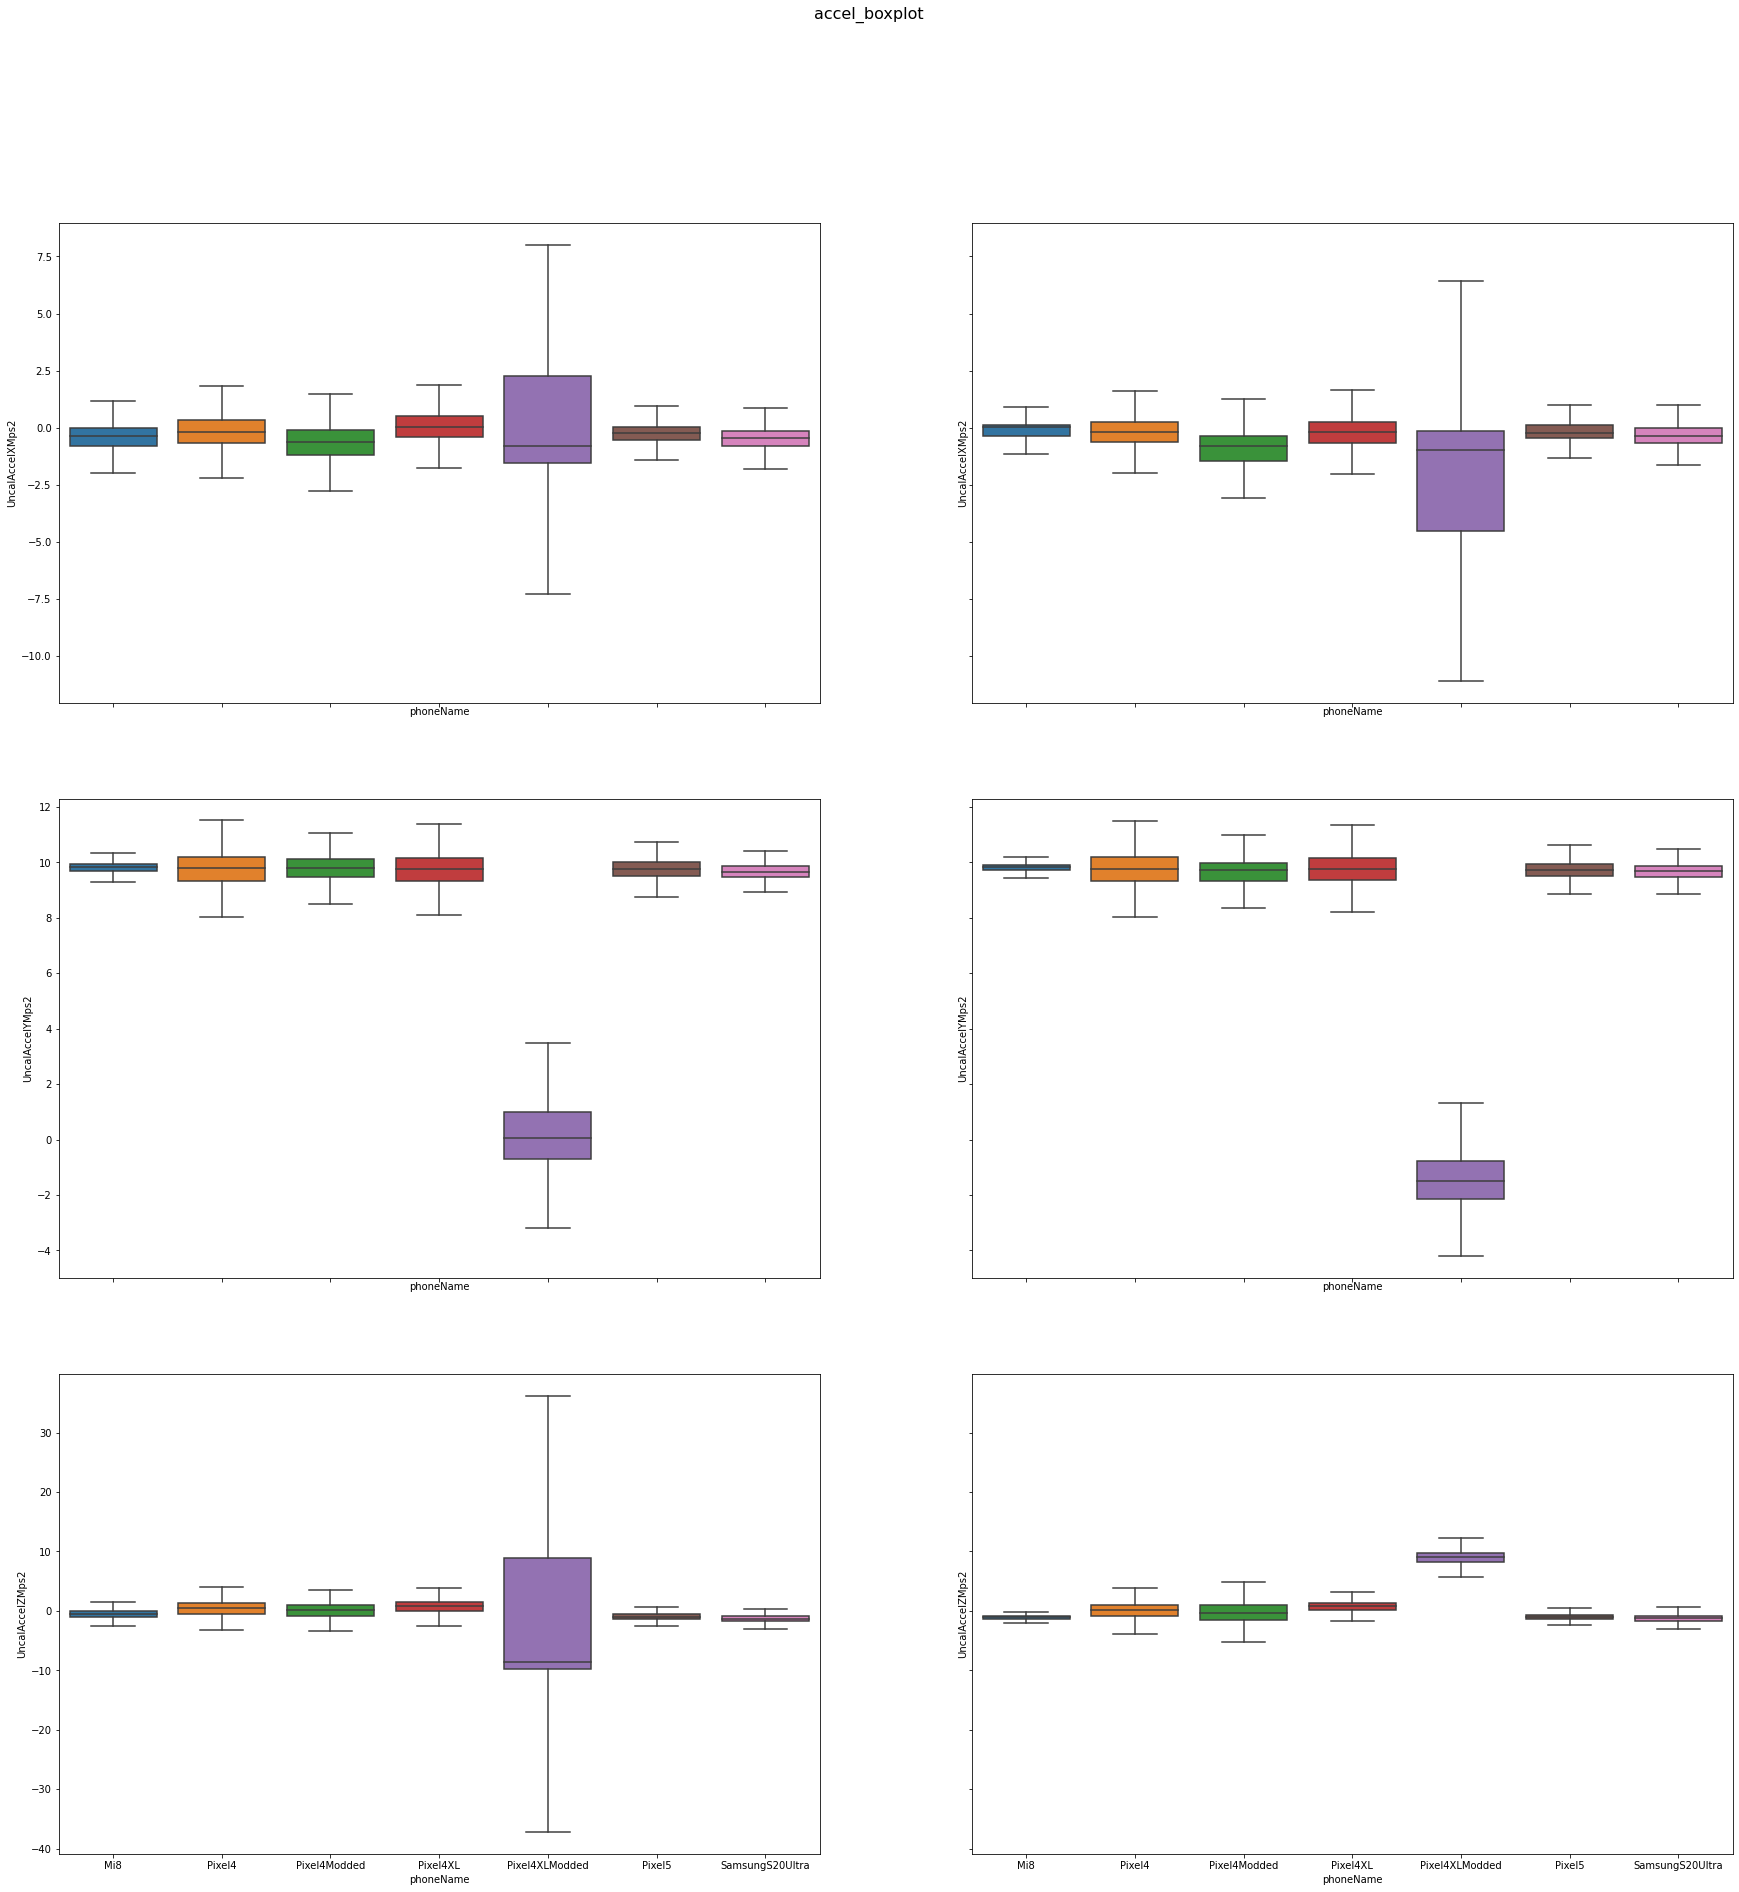

In [106]:
cols = ['UncalAccelXMps2', 'UncalAccelYMps2', 'UncalAccelZMps2']
cols_n = len(cols)
fig, axes = plt.subplots(figsize=(30, 10*cols_n), nrows=cols_n, ncols=2, sharex=True, sharey='row')
for i,c in enumerate(cols):
    sns.boxplot(x='phoneName', y=c, data=accel_train.sort_values('phoneName'), showfliers = False, ax=axes[i][0])
    sns.boxplot(x='phoneName', y=c, data=accel_test.sort_values('phoneName'), showfliers = False, ax=axes[i][1])
fig.suptitle('accel_boxplot', fontsize=16)
fig.savefig(OUTPUT + '/accel_boxplot.png')

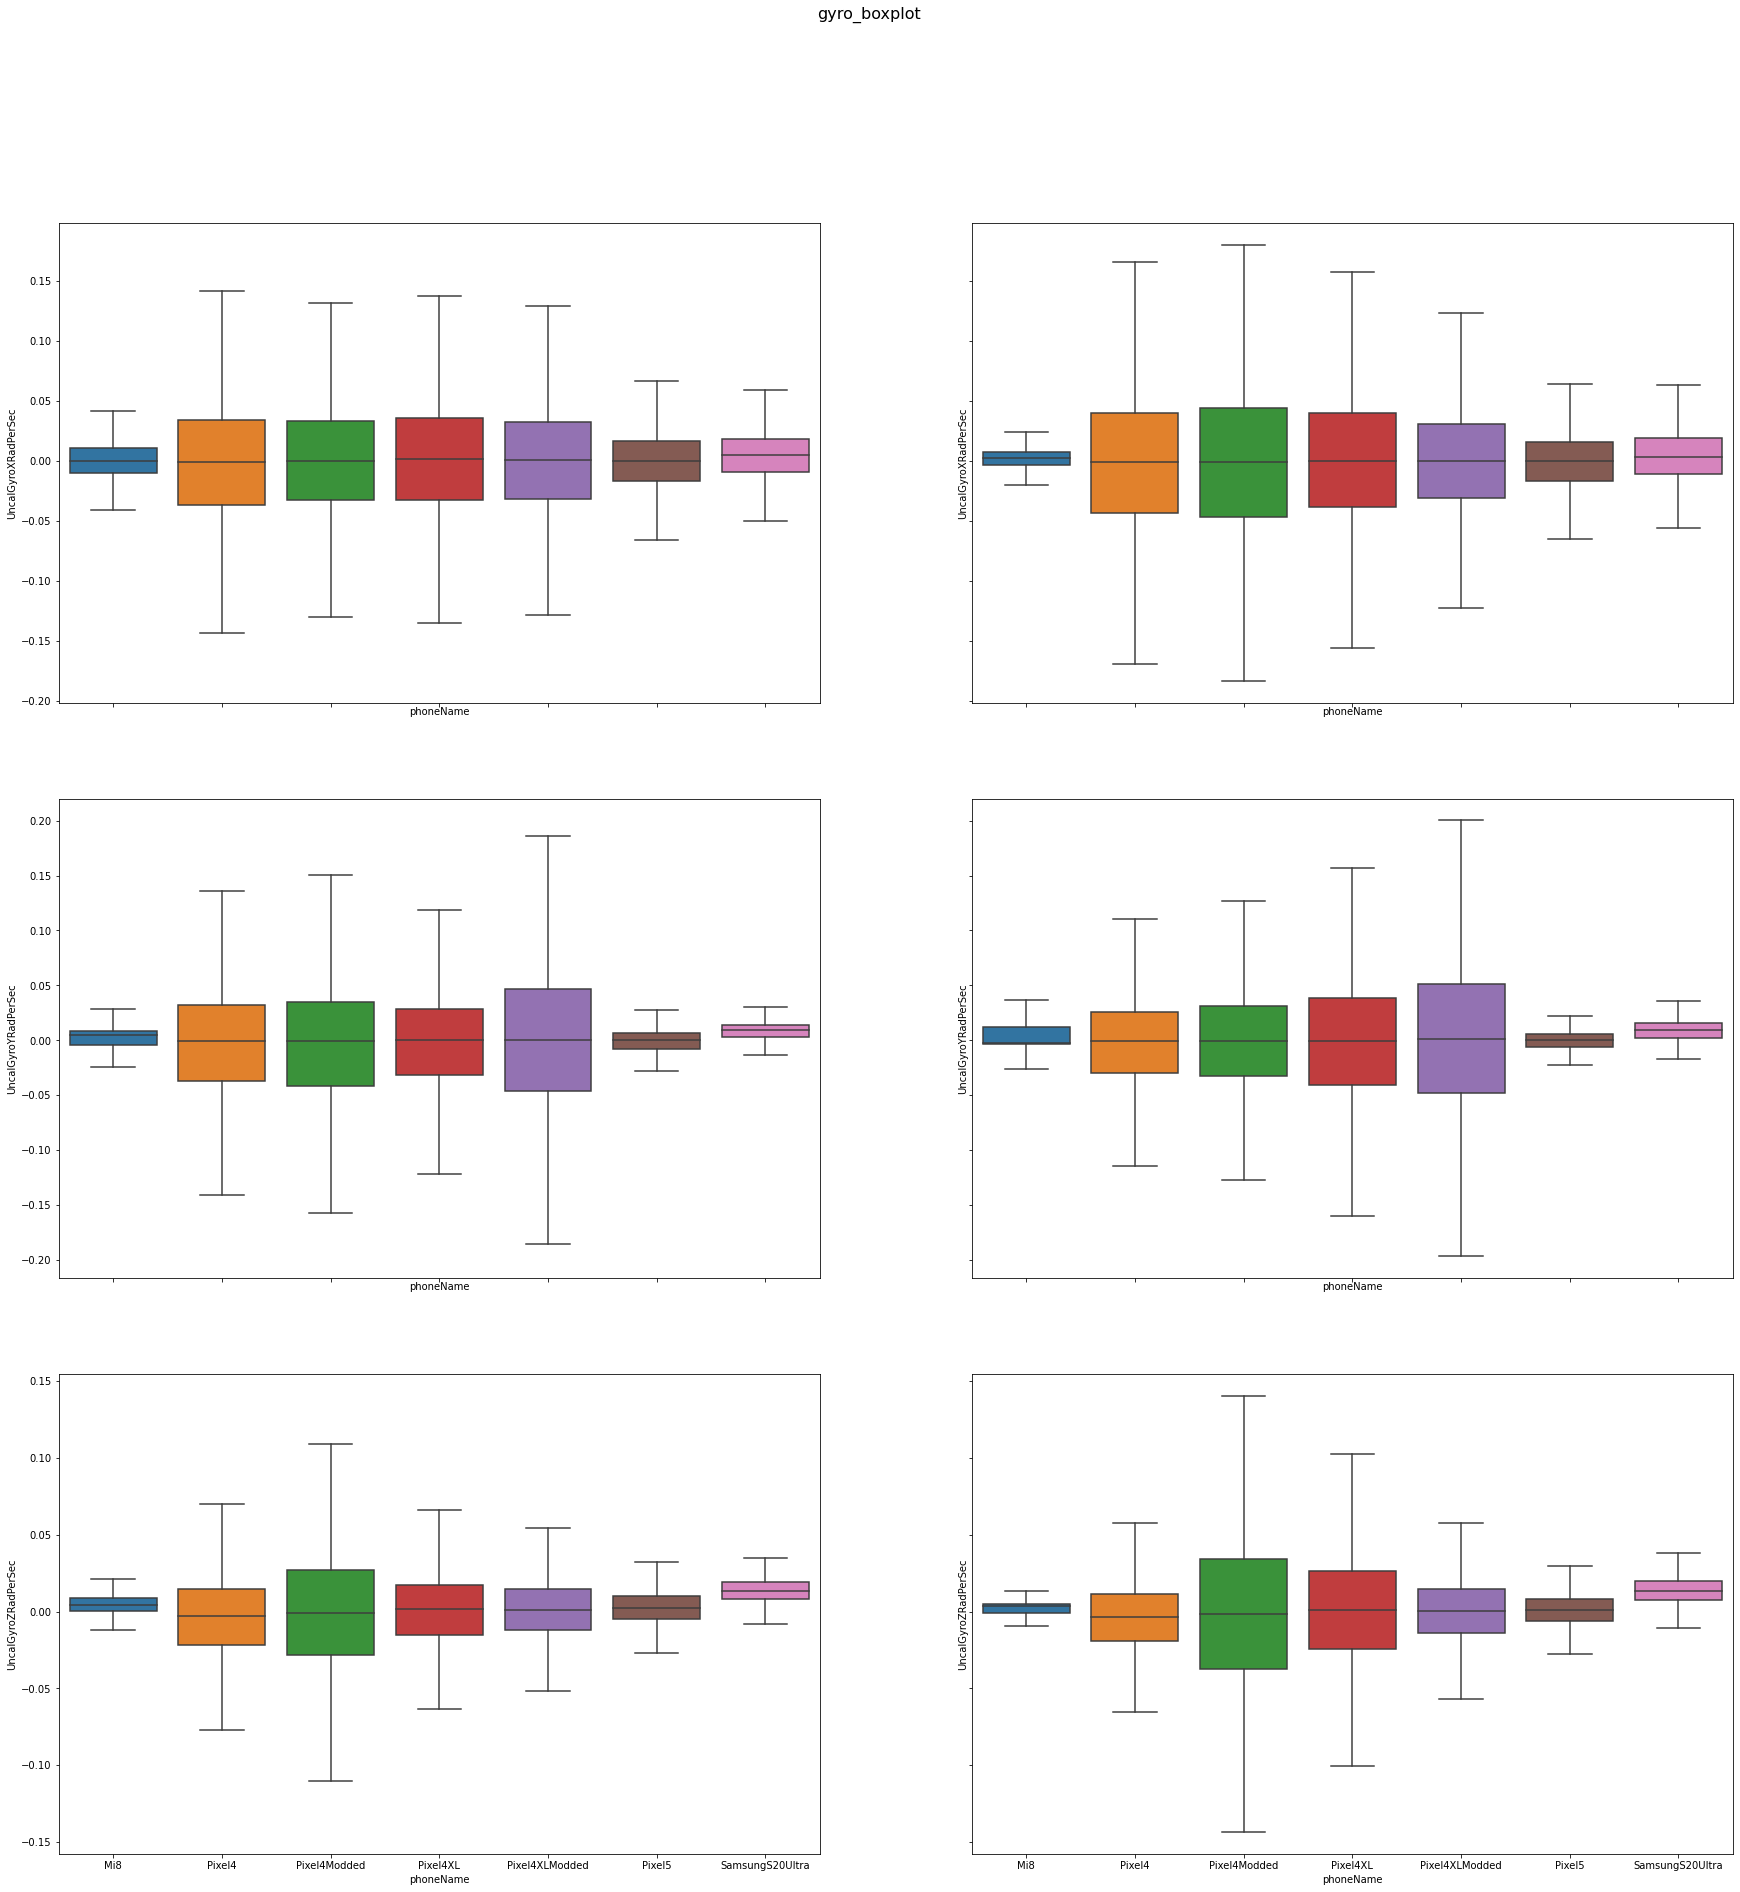

In [107]:
cols = ['UncalGyroXRadPerSec', 'UncalGyroYRadPerSec', 'UncalGyroZRadPerSec']
cols_n = len(cols)
fig, axes = plt.subplots(figsize=(30, 10*cols_n), nrows=cols_n, ncols=2, sharex=True, sharey='row')
for i,c in enumerate(cols):
    sns.boxplot(x='phoneName', y=c, data=gyro_train.sort_values('phoneName'), showfliers = False, ax=axes[i][0])
    sns.boxplot(x='phoneName', y=c, data=gyro_test.sort_values('phoneName'), showfliers = False, ax=axes[i][1])
fig.suptitle('gyro_boxplot', fontsize=16)
fig.savefig(OUTPUT + '/gyro_boxplot.png')

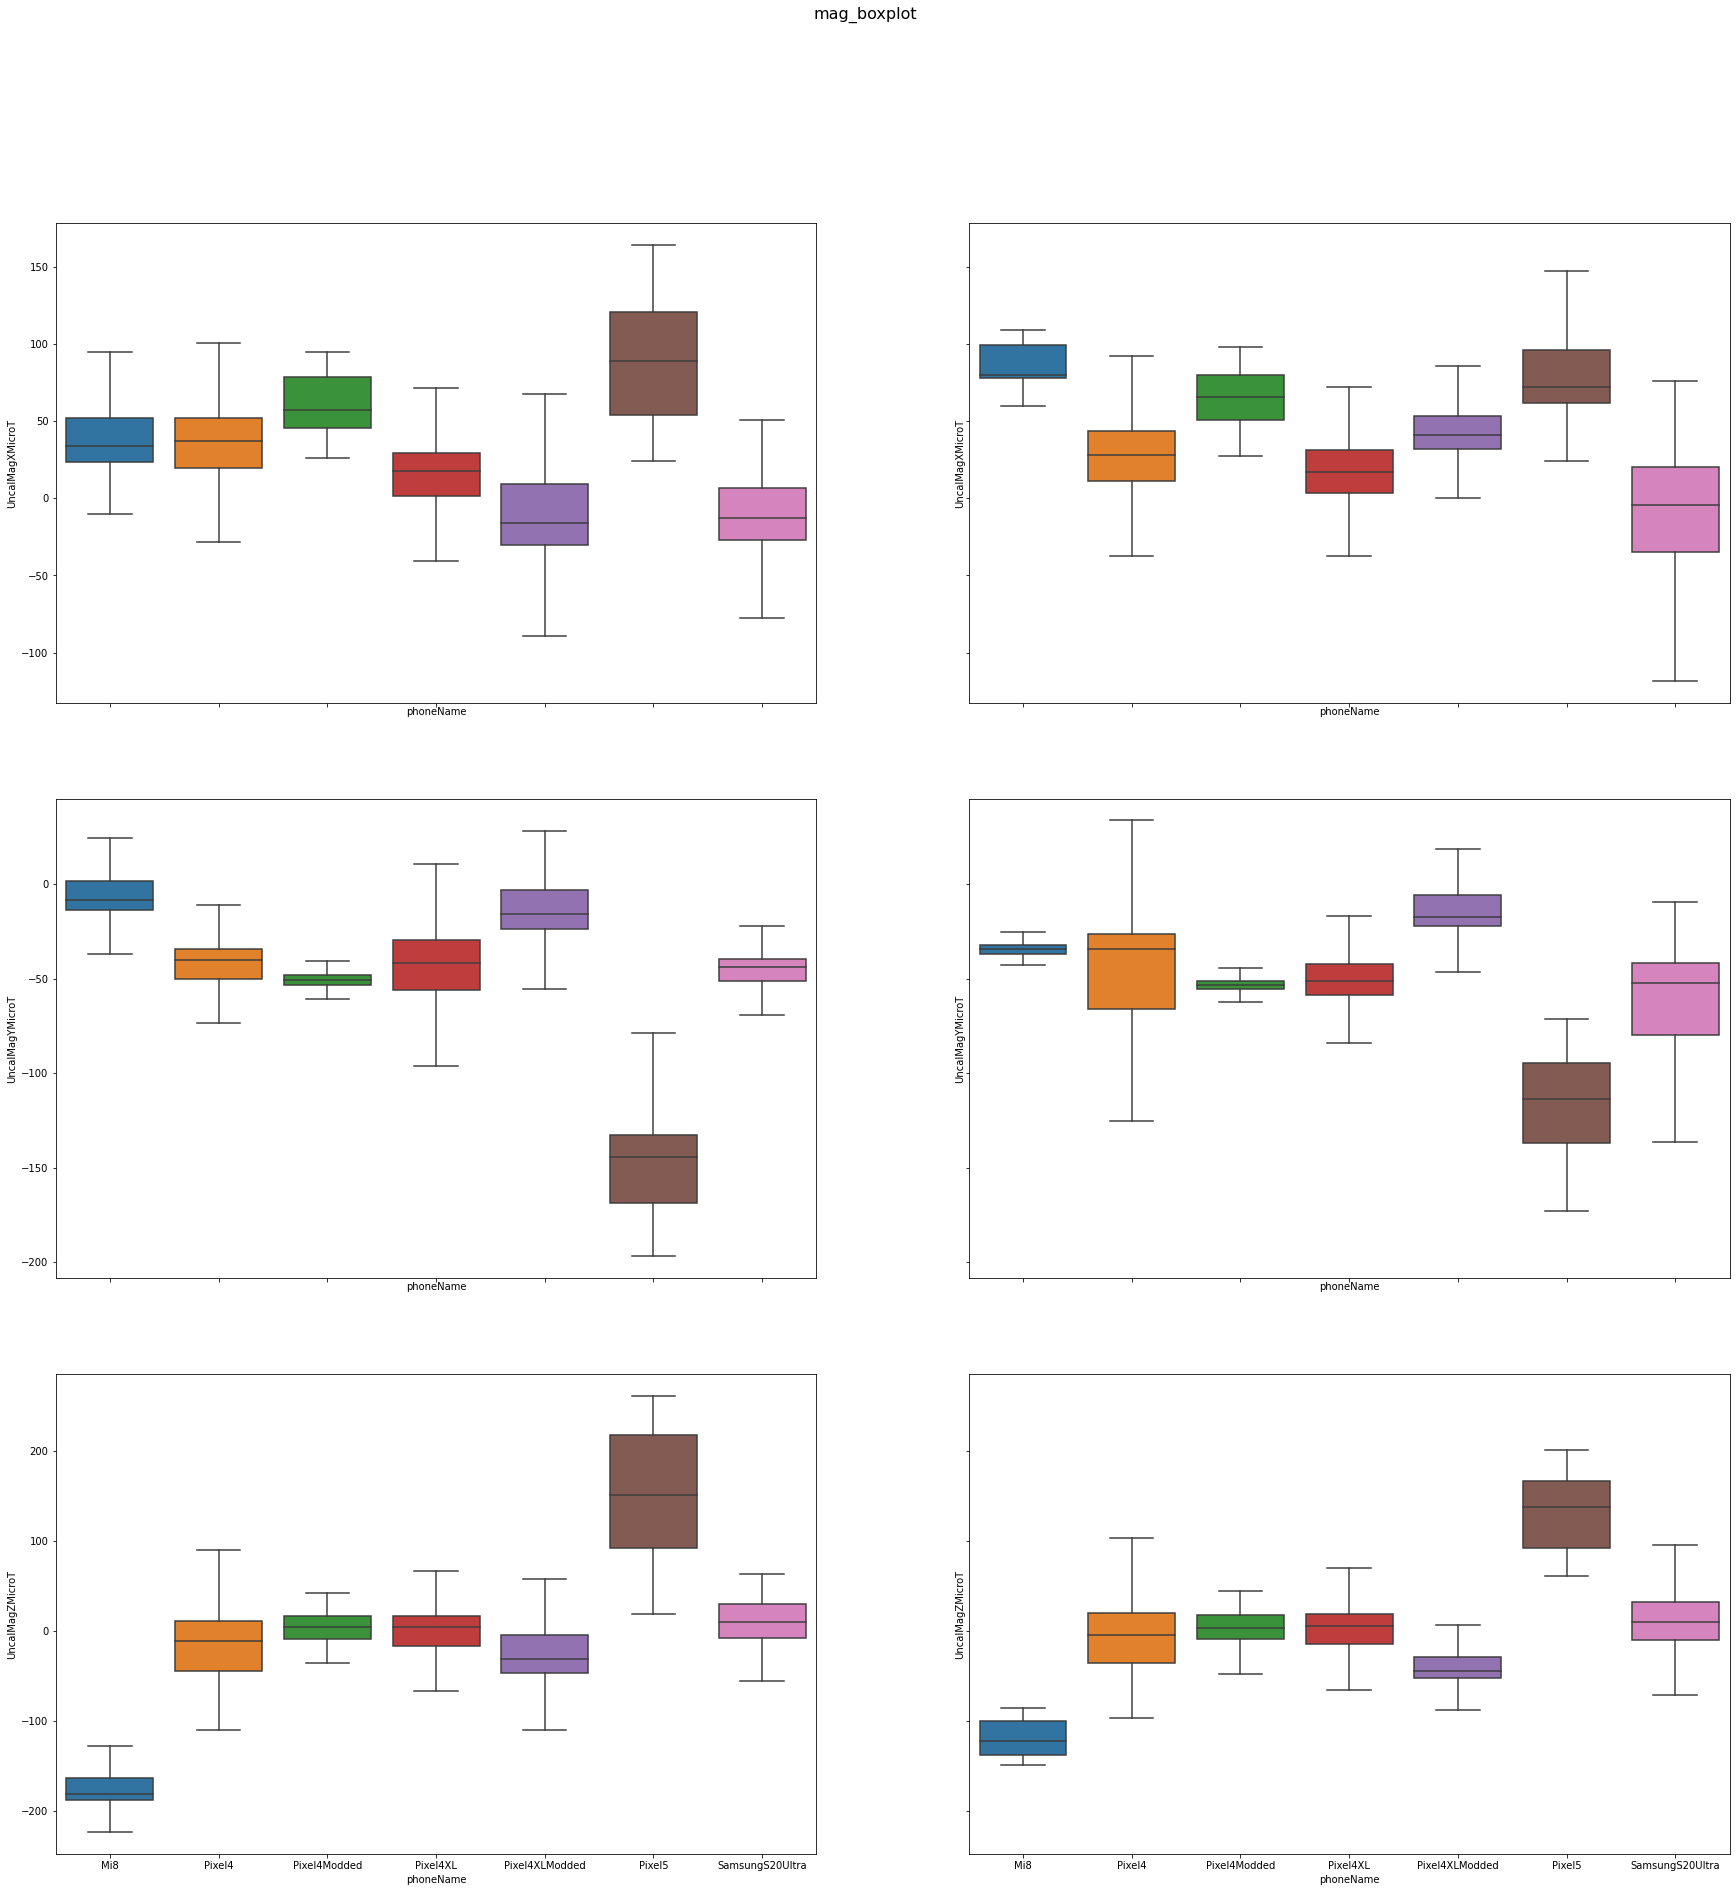

In [108]:
cols = ['UncalMagXMicroT', 'UncalMagYMicroT', 'UncalMagZMicroT']
cols_n = len(cols)
fig, axes = plt.subplots(figsize=(30, 10*cols_n), nrows=cols_n, ncols=2, sharex=True, sharey='row')
for i,c in enumerate(cols):
    sns.boxplot(x='phoneName', y=c, data=mag_train.sort_values('phoneName'), showfliers = False, ax=axes[i][0])
    sns.boxplot(x='phoneName', y=c, data=mag_test.sort_values('phoneName'), showfliers = False, ax=axes[i][1])
fig.suptitle('mag_boxplot', fontsize=16)
fig.savefig(OUTPUT + '/mag_boxplot.png')

# データ加工検討

In [111]:
accel_train

utcTimeMillis  elapsedRealtimeNanos  UncalAccelXMps2  \
0         1590096145767          388949302725        -2.127655   
1         1590096145769          388951731996        -2.427884   
2         1590096145772          388954188610        -2.649440   
3         1590096145774          388956631579        -2.760863   
4         1590096145777          388959060850        -2.775203   
...                 ...                   ...              ...   
20523367  1590796844791         2214597316626         0.133604   
20523368  1590796844800         2214606996262        -0.009243   
20523369  1590796844810         2214616675897        -0.114211   
20523370  1590796844820         2214626355584        -0.131431   
20523371  1590796844830         2214636035220         0.031124   

          UncalAccelYMps2  UncalAccelZMps2       collectionName phoneName  \
0               10.233923        -0.053478  2020-05-21-US-MTV-2    Pixel4   
1               10.108892        -0.152563  2020-05-21-US-MTV-2    Pixel4   
2               10.083163        -0.206106  2020-05-21-US-MTV-2    Pixel4   
3               10.055699        -0.271014  2020-05-21-US-MTV-2    Pixel4   
4               10.070100        -0.285293  2020-05-21-US-MTV-2    Pixel4   
...                   ...              ...                  ...       ...   
20523367        10.150373         1.042262  2020-05-29-US-MTV-2  Pixel4XL   
20523368        10.186256         1.146229  2020-05-29-US-MTV-2  Pixel4XL   
20523369        10.055800         1.365687  2020-05-29-US-MTV-2  Pixel4XL   
20523370         9.785808         1.162168  2020-05-29-US-MTV-2  Pixel4XL   
20523371         9.496376         1.267023  2020-05-29-US-MTV-2  Pixel4XL   

          BiasXMps2  BiasYMps2  BiasZMps2  millisSinceGpsEpoch  \
0               NaN        NaN        NaN        1274131363767   
1               NaN        NaN        NaN        1274131363769   
2               NaN        NaN        NaN        1274131363772   
3               NaN        NaN        NaN        1274131363774   
4               NaN        NaN        NaN        1274131363777   
...             ...        ...        ...                  ...   
20523367        NaN        NaN        NaN        1274832062791   
20523368        NaN        NaN        NaN        1274832062800   
20523369        NaN        NaN        NaN        1274832062810   
20523370        NaN        NaN        NaN        1274832062820   
20523371        NaN        NaN        NaN        1274832062830   

                                 phone  
0           2020-05-21-US-MTV-2_Pixel4  
1           2020-05-21-US-MTV-2_Pixel4  
2           2020-05-21-US-MTV-2_Pixel4  
3           2020-05-21-US-MTV-2_Pixel4  
4           2020-05-21-US-MTV-2_Pixel4  
...                                ...  
20523367  2020-05-29-US-MTV-2_Pixel4XL  
20523368  2020-05-29-US-MTV-2_Pixel4XL  
20523369  2020-05-29-US-MTV-2_Pixel4XL  
20523370  2020-05-29-US-MTV-2_Pixel4XL  
20523371  2020-05-29-US-MTV-2_Pixel4XL  

[20523372 rows x 12 columns]

In [121]:
cols = ['UncalAccelXMps2', 'UncalAccelYMps2', 'UncalAccelZMps2']
new_cols = [c + '_std' for c in cols]
accel_train[new_cols] = accel_train.groupby(['collectionName', 'phoneName'])[cols].transform(lambda x: (x - x.mean()) / x.std())
accel_test[new_cols] = accel_test.groupby(['collectionName', 'phoneName'])[cols].transform(lambda x: (x - x.mean()) / x.std())

In [122]:
cols = ['UncalGyroXRadPerSec', 'UncalGyroYRadPerSec', 'UncalGyroZRadPerSec']
new_cols = [c + '_std' for c in cols]
gyro_train[new_cols] = gyro_train.groupby(['collectionName', 'phoneName'])[cols].transform(lambda x: (x - x.mean()) / x.std())
gyro_test[new_cols] = gyro_test.groupby(['collectionName', 'phoneName'])[cols].transform(lambda x: (x - x.mean()) / x.std())

In [123]:
cols = ['UncalMagXMicroT', 'UncalMagYMicroT', 'UncalMagZMicroT']
new_cols = [c + '_std' for c in cols]
mag_train[new_cols] = mag_train.groupby(['collectionName', 'phoneName'])[cols].transform(lambda x: (x - x.mean()) / x.std())
mag_test[new_cols] = mag_test.groupby(['collectionName', 'phoneName'])[cols].transform(lambda x: (x - x.mean()) / x.std())

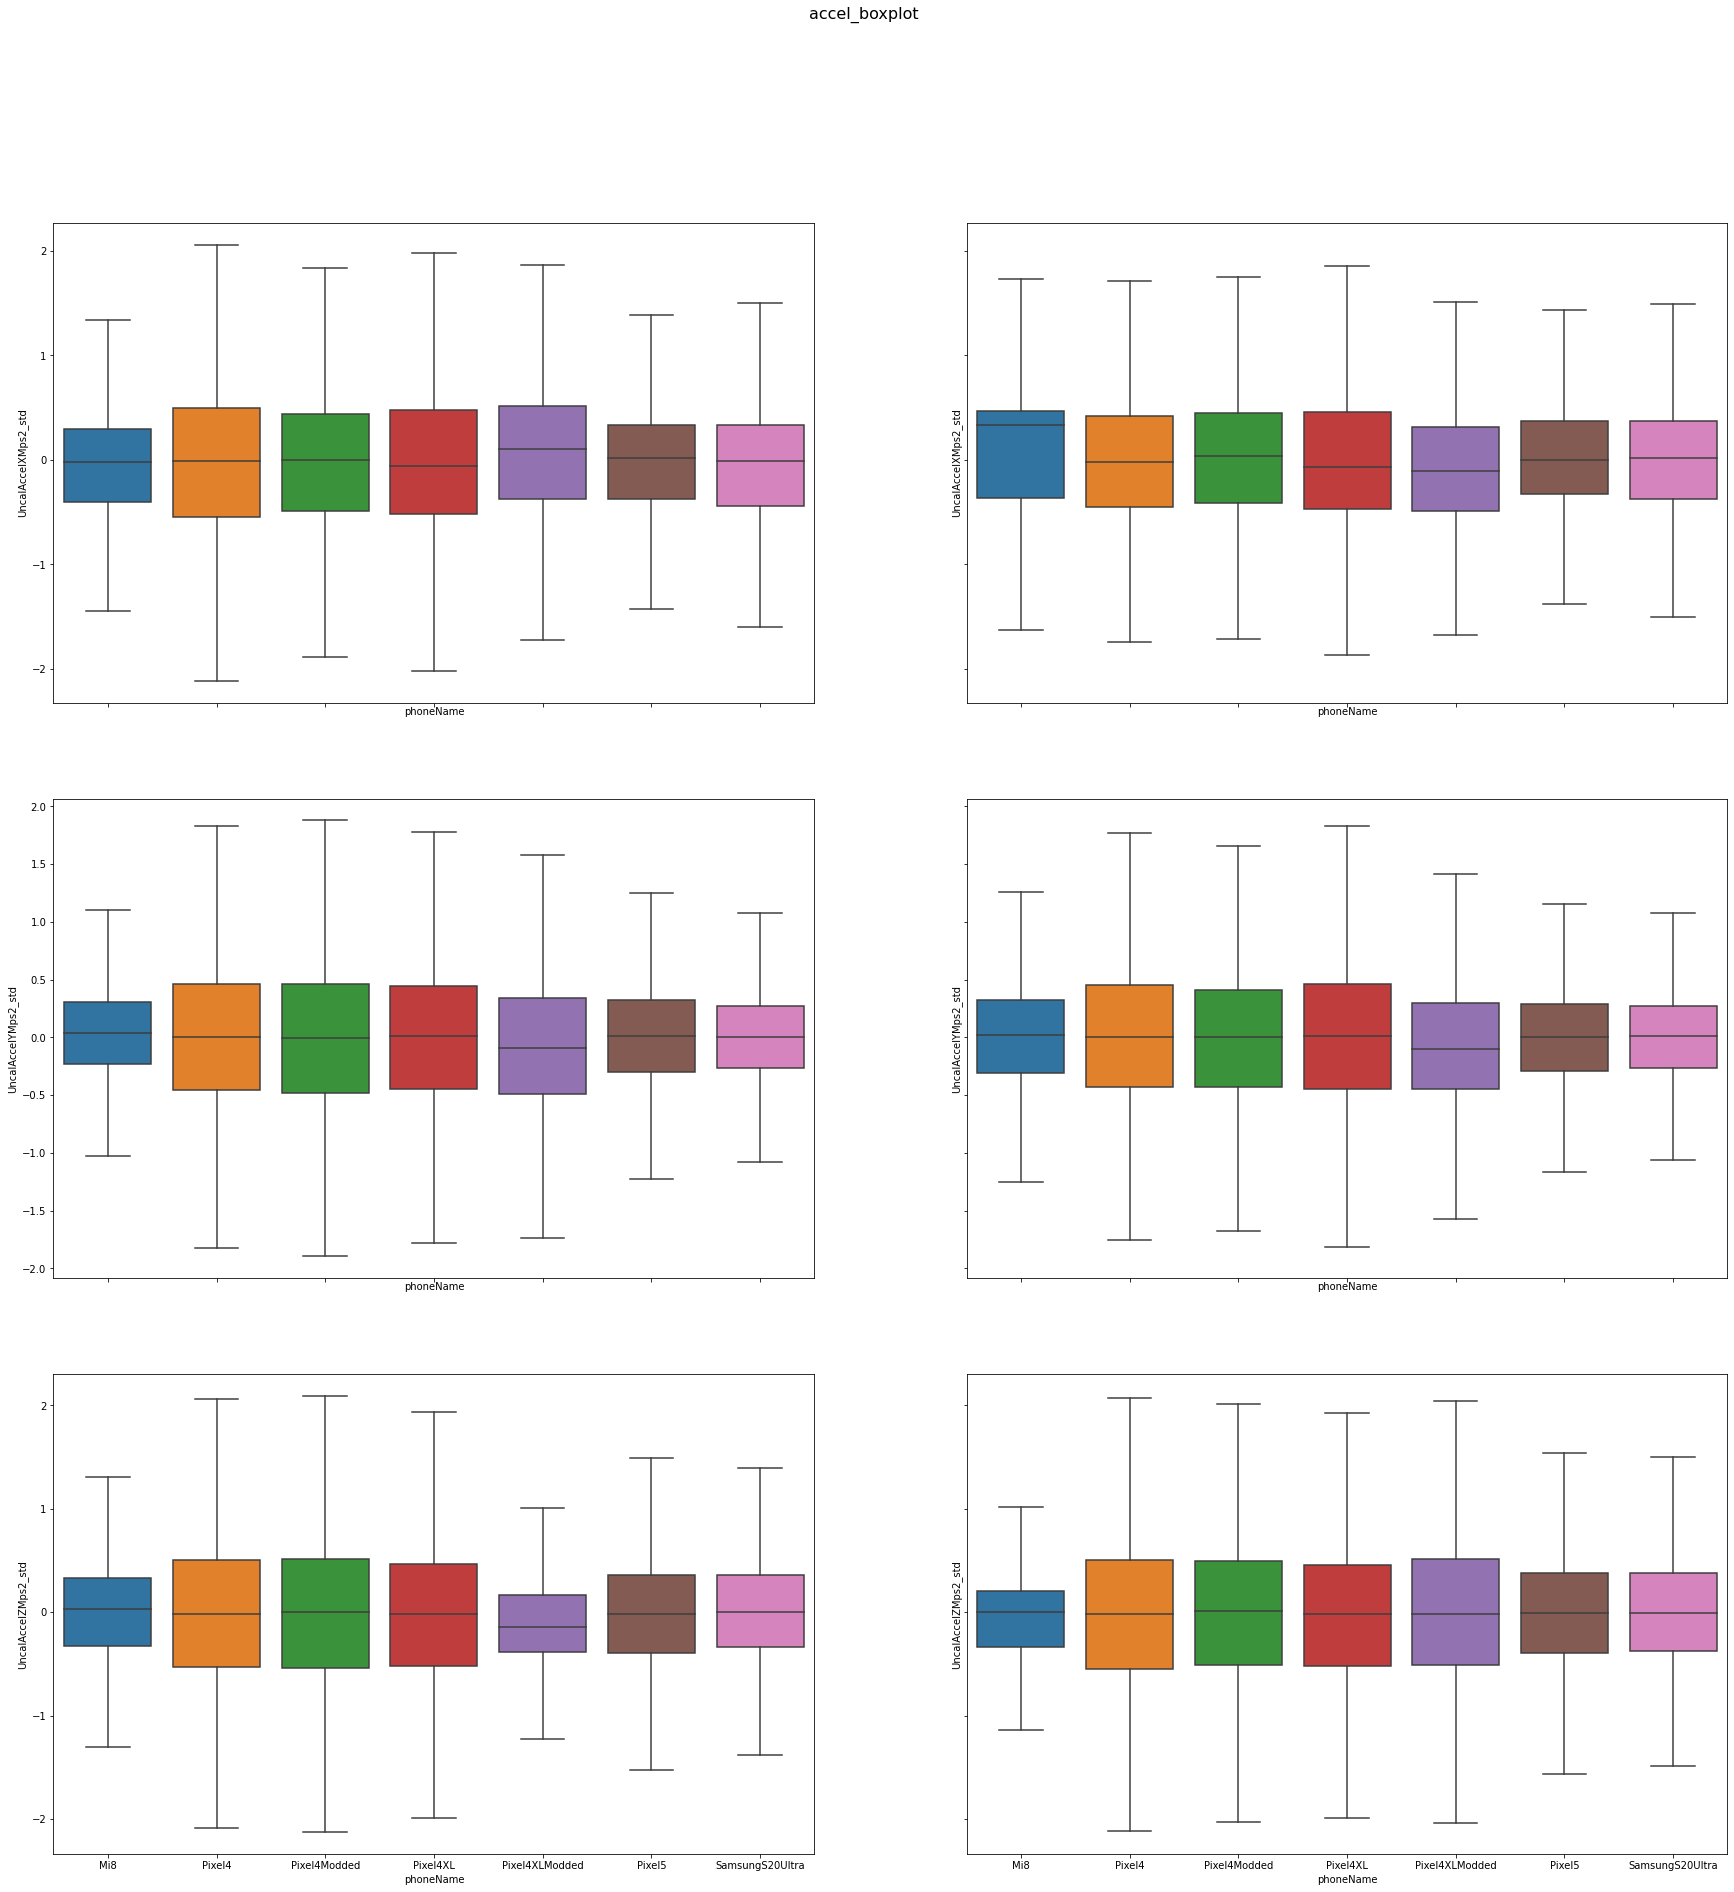

In [124]:
cols = ['UncalAccelXMps2_std', 'UncalAccelYMps2_std', 'UncalAccelZMps2_std']
cols_n = len(cols)
fig, axes = plt.subplots(figsize=(30, 10*cols_n), nrows=cols_n, ncols=2, sharex=True, sharey='row')
for i,c in enumerate(cols):
    sns.boxplot(x='phoneName', y=c, data=accel_train.sort_values('phoneName'), showfliers = False, ax=axes[i][0])
    sns.boxplot(x='phoneName', y=c, data=accel_test.sort_values('phoneName'), showfliers = False, ax=axes[i][1])
fig.suptitle('accel_boxplot', fontsize=16)
fig.savefig(OUTPUT + '/accel_std_boxplot.png')

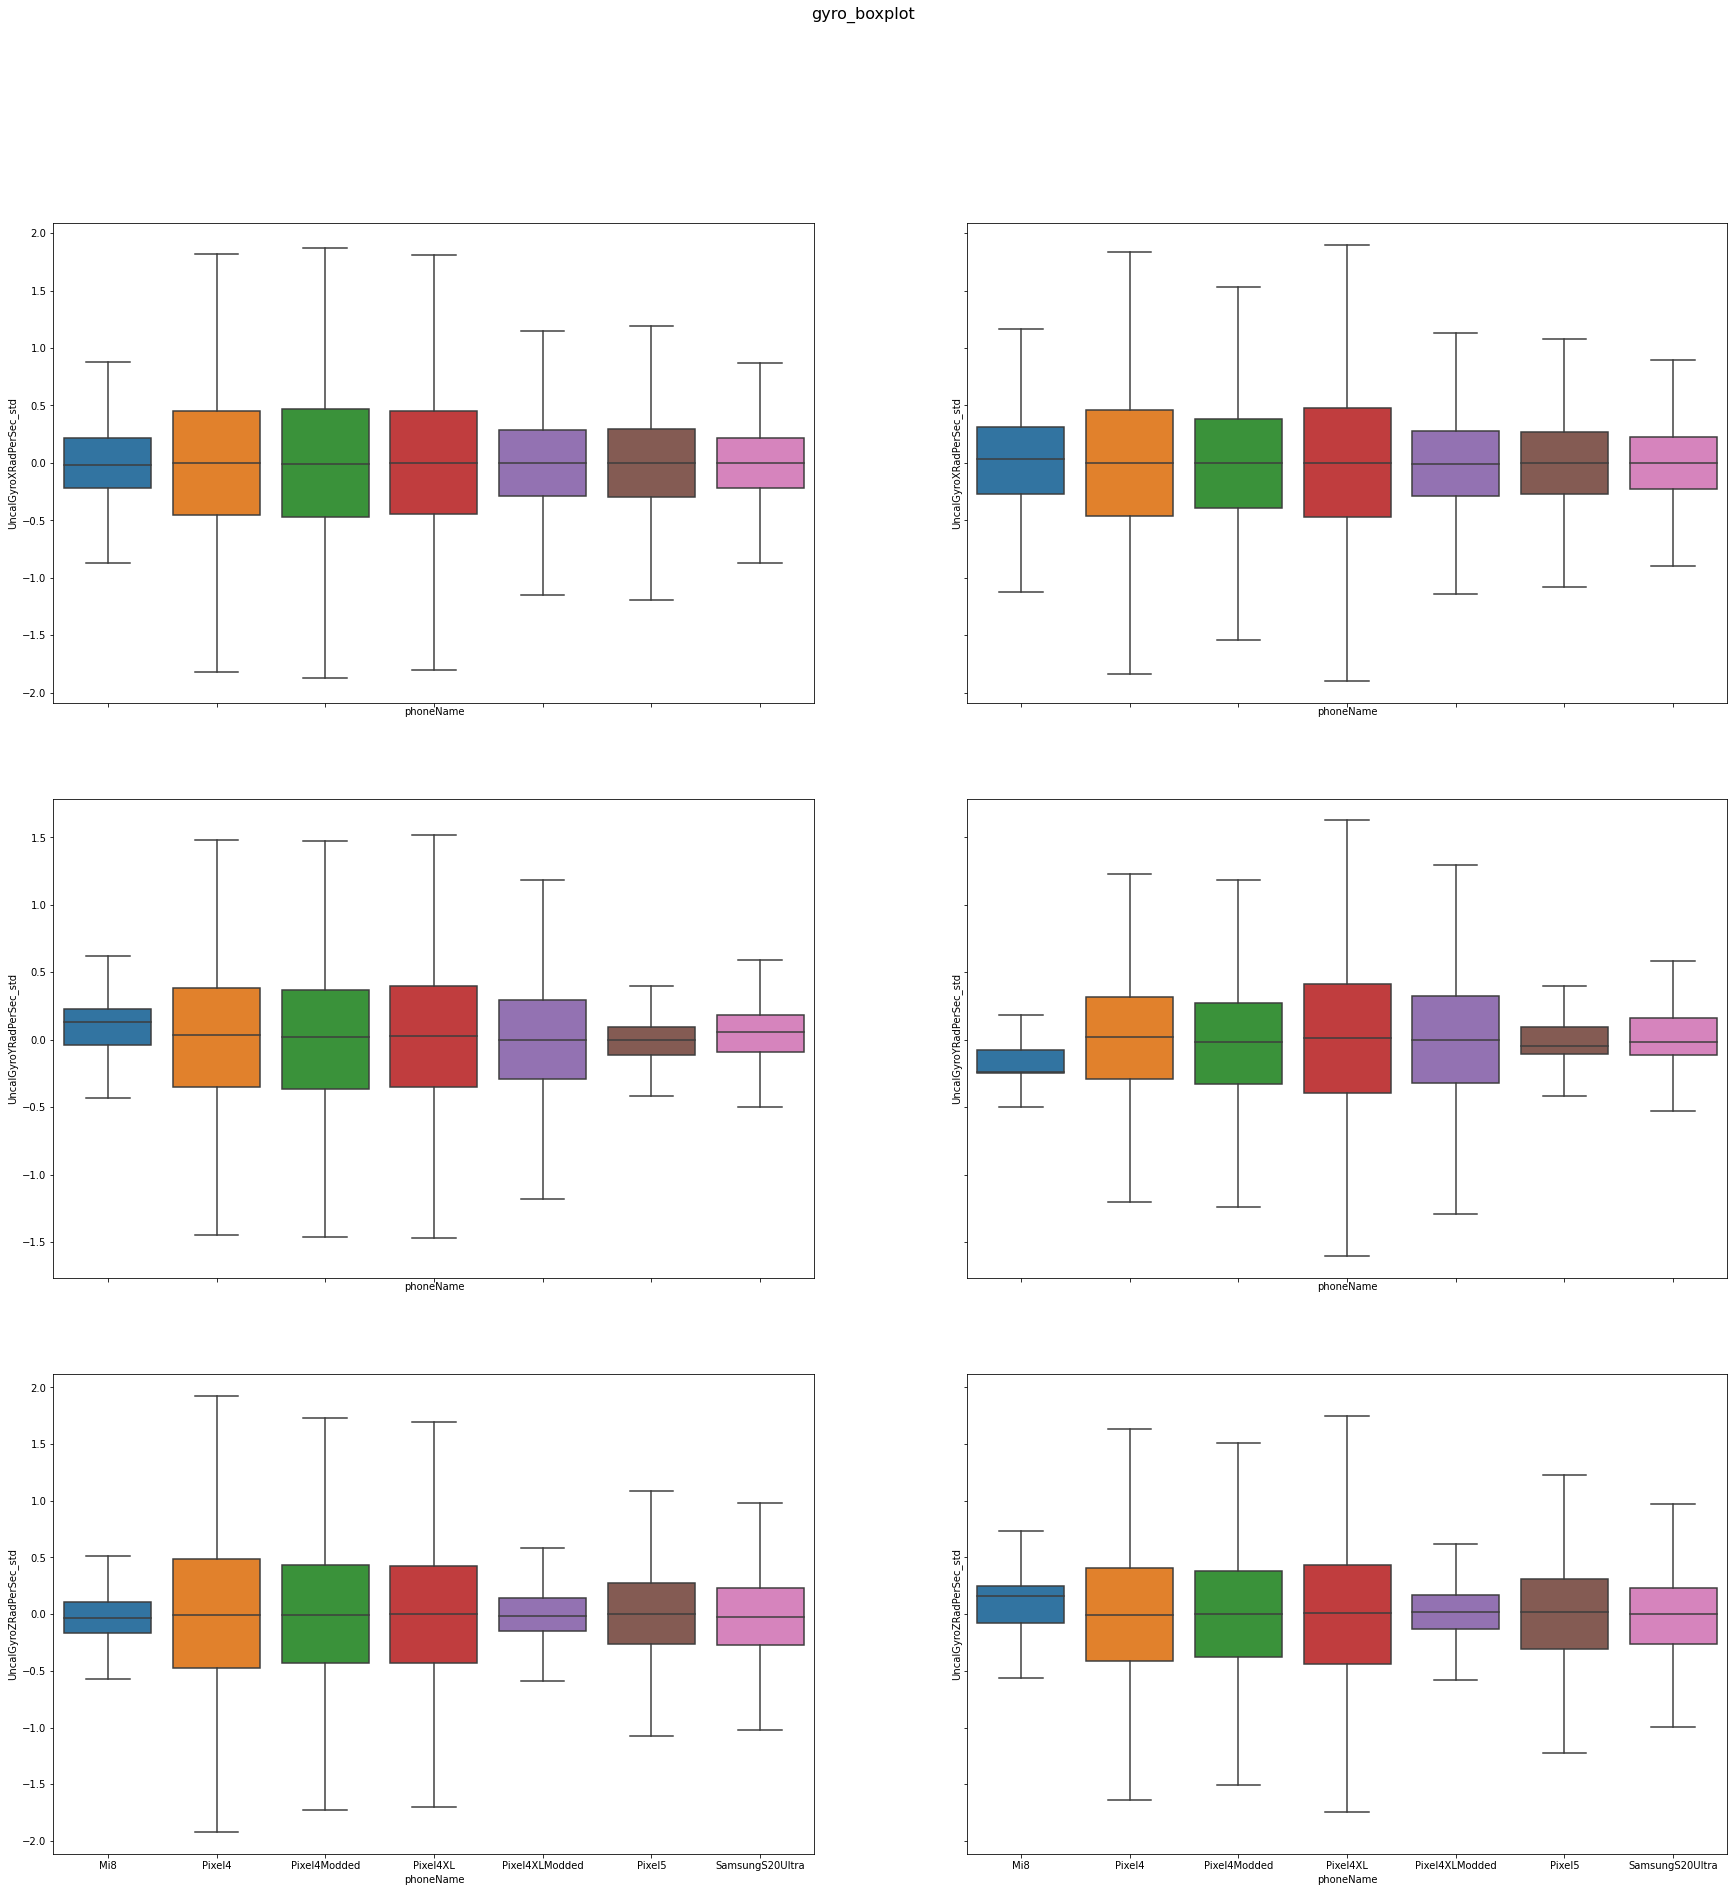

In [125]:
cols = ['UncalGyroXRadPerSec_std', 'UncalGyroYRadPerSec_std', 'UncalGyroZRadPerSec_std']
cols_n = len(cols)
fig, axes = plt.subplots(figsize=(30, 10*cols_n), nrows=cols_n, ncols=2, sharex=True, sharey='row')
for i,c in enumerate(cols):
    sns.boxplot(x='phoneName', y=c, data=gyro_train.sort_values('phoneName'), showfliers = False, ax=axes[i][0])
    sns.boxplot(x='phoneName', y=c, data=gyro_test.sort_values('phoneName'), showfliers = False, ax=axes[i][1])
fig.suptitle('gyro_boxplot', fontsize=16)
fig.savefig(OUTPUT + '/gyro_std_boxplot.png')

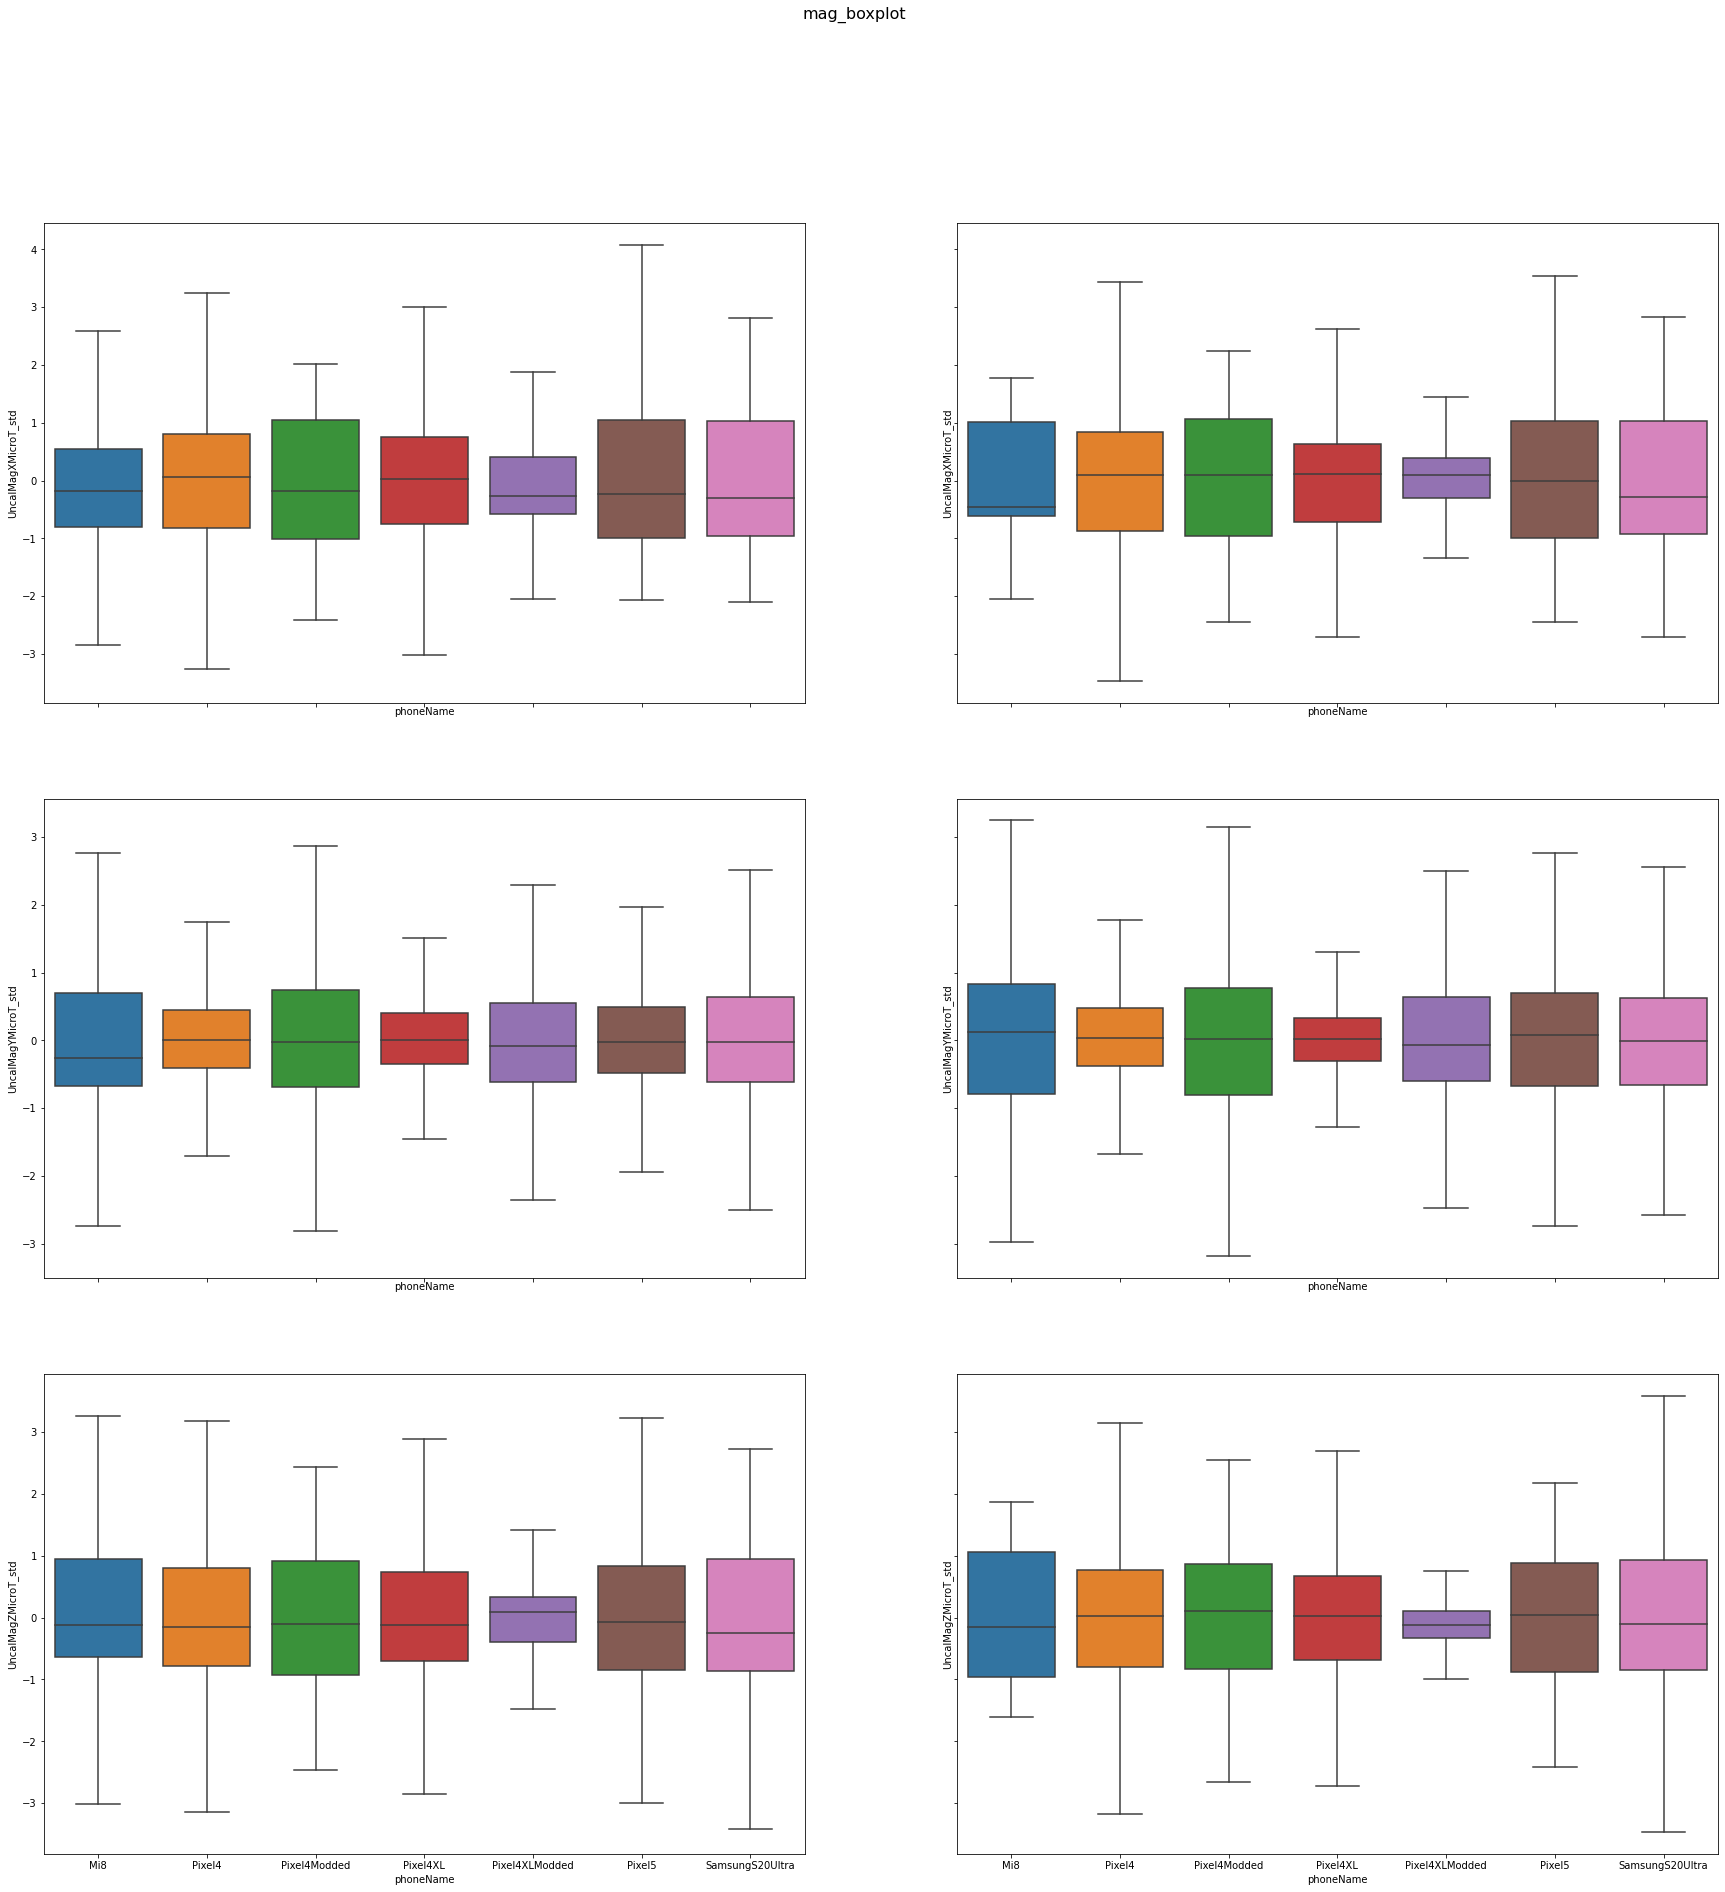

In [126]:
cols = ['UncalMagXMicroT_std', 'UncalMagYMicroT_std', 'UncalMagZMicroT_std']
cols_n = len(cols)
fig, axes = plt.subplots(figsize=(30, 10*cols_n), nrows=cols_n, ncols=2, sharex=True, sharey='row')
for i,c in enumerate(cols):
    sns.boxplot(x='phoneName', y=c, data=mag_train.sort_values('phoneName'), showfliers = False, ax=axes[i][0])
    sns.boxplot(x='phoneName', y=c, data=mag_test.sort_values('phoneName'), showfliers = False, ax=axes[i][1])
fig.suptitle('mag_boxplot', fontsize=16)
fig.savefig(OUTPUT + '/mag_std_boxplot.png')

In [155]:
accel_train['millisSinceGpsEpoch'] - accel_train['millisSinceGpsEpoch'].shift(1)

0            NaN
1            2.0
2            3.0
3            2.0
4            3.0
            ... 
20523367    10.0
20523368     9.0
20523369    10.0
20523370    10.0
20523371    10.0
Name: millisSinceGpsEpoch, Length: 20523372, dtype: float64

In [156]:
base_train['millisSinceGpsEpoch'] - base_train['millisSinceGpsEpoch'].shift(1)

0            NaN
1         1000.0
2         1000.0
3         1000.0
4         1000.0
           ...  
131337    1000.0
131338    1000.0
131339    1000.0
131340    1000.0
131341    1000.0
Name: millisSinceGpsEpoch, Length: 131342, dtype: float64

In [157]:
cols = ['UncalAccelXMps2_std', 'UncalAccelYMps2_std', 'UncalAccelZMps2_std']
new_cols = [c + '_rolling_mean100' for c in cols]
accel_train[new_cols] = accel_train.groupby(['collectionName', 'phoneName'])[cols].rolling(100, center=True, min_periods=0).mean().reset_index()[cols]
accel_test[new_cols] = accel_test.groupby(['collectionName', 'phoneName'])[cols].rolling(100, center=True, min_periods=0).mean().reset_index()[cols]

In [158]:
cols = ['UncalAccelXMps2_std', 'UncalAccelYMps2_std', 'UncalAccelZMps2_std']
new_cols = [c + '_rolling_std100' for c in cols]
accel_train[new_cols] = accel_train.groupby(['collectionName', 'phoneName'])[cols].rolling(100, center=True, min_periods=0).std().reset_index()[cols]
accel_test[new_cols] = accel_test.groupby(['collectionName', 'phoneName'])[cols].rolling(100, center=True, min_periods=0).std().reset_index()[cols]

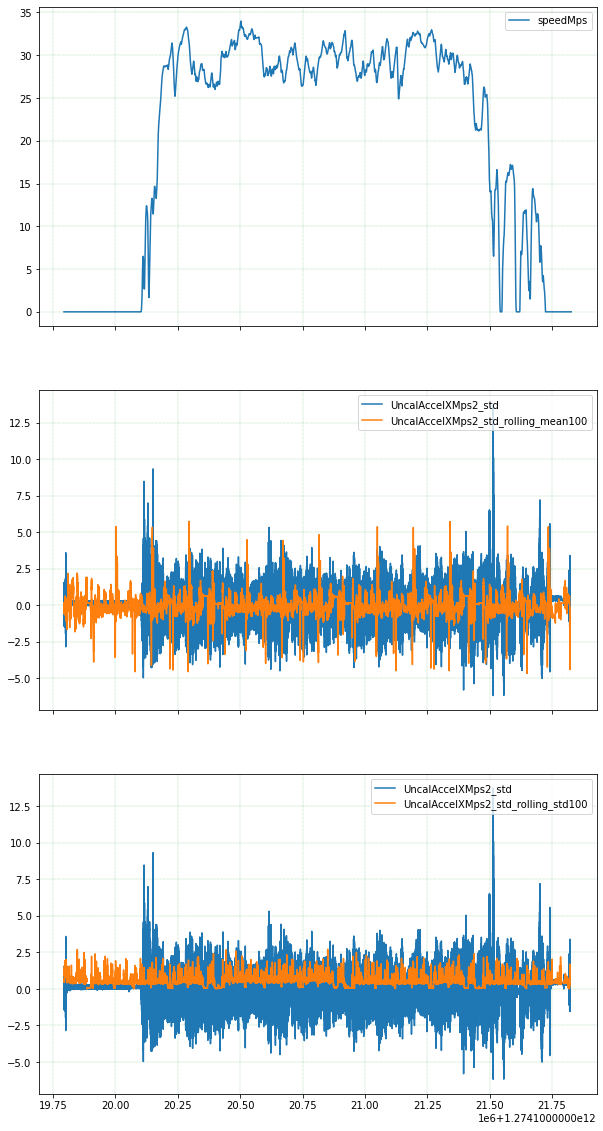

In [168]:
phones = ground_truth['phone'].unique()

phone = phones[4]


df_tmp = ground_truth[ground_truth['phone']==phone].copy()
gnss_tmp = accel_train[accel_train['phone']==phone].copy()

fig, axes = plt.subplots(figsize=(10, 20), nrows=cols_n,sharex=True)
axes[0].plot(df_tmp['millisSinceGpsEpoch'], df_tmp['speedMps'], label='speedMps')
axes[0].legend(loc='upper right')
axes[0].grid(color='g', linestyle=':', linewidth=0.3)

axes[1].plot(gnss_tmp['millisSinceGpsEpoch'], gnss_tmp['UncalAccelXMps2_std'], label='UncalAccelXMps2_std')
axes[1].plot(gnss_tmp['millisSinceGpsEpoch'], gnss_tmp['UncalAccelXMps2_std_rolling_mean100'], label='UncalAccelXMps2_std_rolling_mean100')
axes[1].legend(loc='upper right')
axes[1].grid(color='g', linestyle=':', linewidth=0.3)

axes[2].plot(gnss_tmp['millisSinceGpsEpoch'], gnss_tmp['UncalAccelXMps2_std'], label='UncalAccelXMps2_std')
axes[2].plot(gnss_tmp['millisSinceGpsEpoch'], gnss_tmp['UncalAccelXMps2_std_rolling_std100'], label='UncalAccelXMps2_std_rolling_std100')
axes[2].legend(loc='upper right')
axes[2].grid(color='g', linestyle=':', linewidth=0.3)

<AxesSubplot:xlabel='phoneName', ylabel='time_diff'>

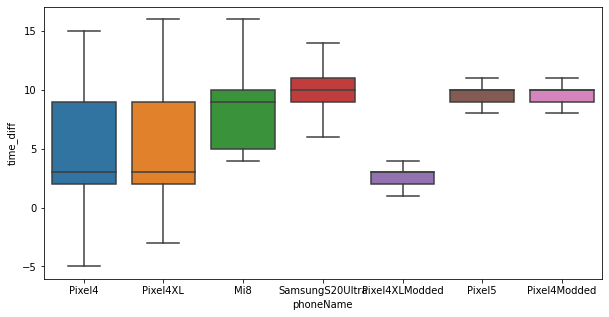

In [176]:
accel_train['time_diff'] = accel_train['millisSinceGpsEpoch'] - accel_train['millisSinceGpsEpoch'].shift(1)
accel_train.loc[accel_train['phone']!=accel_train['phone'].shift(1), 'time_diff'] = np.nan

plt.figure(figsize=(10,5))
sns.boxplot(x='phoneName', y='time_diff', data=accel_train, showfliers = False)

<AxesSubplot:xlabel='phoneName', ylabel='time_diff'>

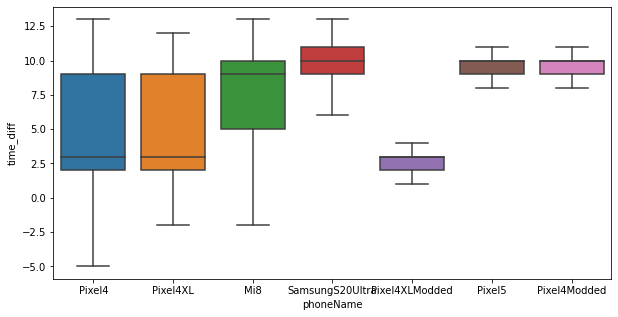

In [177]:
gyro_train['time_diff'] = gyro_train['millisSinceGpsEpoch'] - gyro_train['millisSinceGpsEpoch'].shift(1)
gyro_train.loc[gyro_train['phone']!=gyro_train['phone'].shift(1), 'time_diff'] = np.nan

plt.figure(figsize=(10,5))
sns.boxplot(x='phoneName', y='time_diff', data=gyro_train, showfliers = False)

<AxesSubplot:xlabel='phoneName', ylabel='time_diff'>

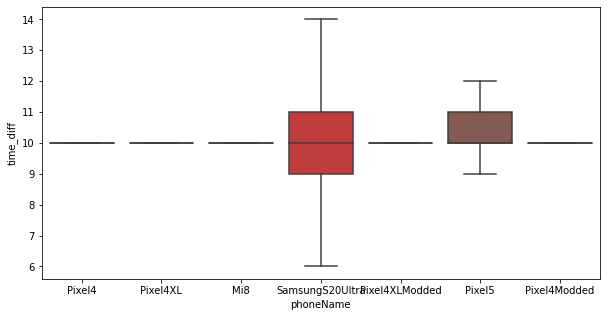

In [178]:
mag_train['time_diff'] = mag_train['millisSinceGpsEpoch'] - mag_train['millisSinceGpsEpoch'].shift(1)
mag_train.loc[mag_train['phone']!=mag_train['phone'].shift(1), 'time_diff'] = np.nan

plt.figure(figsize=(10,5))
sns.boxplot(x='phoneName', y='time_diff', data=mag_train, showfliers = False)

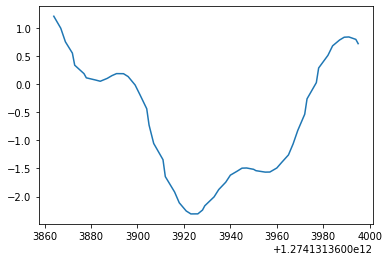

In [189]:
tmp = accel_train[40:95]
plt.plot(tmp['millisSinceGpsEpoch'], tmp['UncalAccelXMps2'])

In [190]:
tmp['millisSinceGpsEpoch'].max() - tmp['millisSinceGpsEpoch'].min()

131